<a href="https://colab.research.google.com/github/saziaa/Predicting-and-Interpreting-ED-Length-of-Stay-A-Machine-Learning-Approach/blob/main/CIHI_ED_LOS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

def clean_cihi_table(file_path, numeric_cols, separate_totals=True, encoding="cp1252", save_csv=None):
    """
    Cleans a CIHI ED table CSV file.

    Parameters:
    - file_path: str, path to the CSV file
    - numeric_cols: list of str, columns to convert to numeric
    - separate_totals: bool, whether to separate rows with 'Total' in age_group
    - encoding: str, file encoding (default cp1252)
    - save_csv: str or None, path to save cleaned CSV

    Returns:
    - df_clean: cleaned dataframe without totals
    - df_totals: dataframe of totals (if separate_totals=True), else None
    """
    # Read CSV
    df = pd.read_csv(file_path, encoding=encoding)

    # Drop unnamed/empty columns
    df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

    # Clean column names
    df.columns = (
        df.columns.str.replace("\n", " ", regex=False)
                  .str.replace(r"[()]", "", regex=True)
                  .str.replace(" ", "_", regex=False)
                  .str.replace("__", "_", regex=False)
                  .str.lower()
                  .str.strip()
    )

    # Replace suppressed/missing values
    df.replace({"n/r": np.nan, "n/d": np.nan}, inplace=True)

    # Convert numeric columns
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "", regex=False), errors="coerce")

    # Separate totals if needed
    df_totals = None
    if separate_totals and "age_group" in df.columns:
        df_totals = df[df["age_group"].str.lower() == "total"].copy()
        df_clean = df[df["age_group"].str.lower() != "total"].copy()
        df_clean.reset_index(drop=True, inplace=True)
        df_totals.reset_index(drop=True, inplace=True)
    else:
        df_clean = df.copy()

    # Save cleaned CSV
    if save_csv:
        df_clean.to_csv(save_csv, index=False)
        if df_totals is not None:
            totals_csv = save_csv.replace(".csv", "_totals.csv")
            df_totals.to_csv(totals_csv, index=False)

    return df_clean, df_totals


In [ ]:
# Table 1 (age & sex)
numeric_columns_t1 = ["number_of_ed_visits", "median_length_of_stay_minutes"]
df1_clean, df1_totals = clean_cihi_table('/content/ED_vist_byAge&Sex.csv', numeric_columns_t1, save_csv="table1_clean.csv")

In [ ]:
# Create year_start from fiscal_year
df1_clean["year_start"] = df1_clean["fiscal_year"].str[:4].astype(int)

df1_clean.head()

,fiscal_year,sex,age_group,number_of_ed_visits,median_length_of_stay_minutes,year_start
0,2021–2022,All,00–04,1038994,162.0,2021
1,2021–2022,All,05–09,431471,150.0,2021
2,2021–2022,All,10–14,460661,162.0,2021
3,2021–2022,All,15–19,709180,186.0,2021
4,2021–2022,All,20–24,914580,192.0,2021


In [ ]:
# Table 2 (triage level)
numeric_columns_t2 = ["number_of_ed_visits", "median_length_of_stay_minutes"]
df2_clean, df2_totals = clean_cihi_table('/content/ED_visit_by_Triage.csv', numeric_columns_t2, save_csv="table2_clean.csv")

In [ ]:
df2_clean.head()

,fiscal_year,sex,triage_level,age_group,number_of_ed_visits,median_length_of_stay_minutes
0,2021–2022,All,Resuscitation,00–19,22758,234.0
1,2021–2022,All,Resuscitation,20–44,29926,336.0
2,2021–2022,All,Resuscitation,45–64,32434,312.0
3,2021–2022,All,Resuscitation,65+,56151,384.0
4,2021–2022,All,Emergent,00–19,421027,216.0


In [ ]:
# Table 3 (visit disposition)
numeric_columns_t3 = ["number_of_ed_visits", "median_length_of_stay_minutes"]
df3_clean, df3_totals = clean_cihi_table('/content/ED_visit_by_visitDisposition.csv', numeric_columns_t3, save_csv="table3_clean.csv")

In [ ]:
df3_clean.head()

,fiscal_year,sex,visit_disposition,age_group,number_of_ed_visits,median_length_of_stay_minutes
0,2021–2022,All,Discharged home,00–19,2276713,156.0
1,2021–2022,All,Discharged home,20–44,3835086,186.0
2,2021–2022,All,Discharged home,45–64,2666691,204.0
3,2021–2022,All,Discharged home,65+,2259147,240.0
4,2021–2022,All,Not seen or left,00–19,196851,150.0


In [ ]:
# Table 4 (main problems)
numeric_columns_t4 = ["number_of_ed_visits", "median_length_of_stay_minutes"]
df4_clean, df4_totals = clean_cihi_table('/content/ED_visit_byMainProblems.csv', numeric_columns_t4, save_csv="table4_clean.csv")

In [ ]:
df4_clean.head()

,fiscal_year,sex,main_problem,age_group,number_of_ed_visits,median_length_of_stay_minutes
0,2021–2022,All,Acute myocardial infarction,00–19,12.0,342.0
1,2021–2022,All,Acute myocardial infarction,20–44,1231.0,294.0
2,2021–2022,All,Acute myocardial infarction,45–64,9630.0,324.0
3,2021–2022,All,Acute myocardial infarction,65+,15620.0,438.0
4,2021–2022,All,Asthma,00–19,18888.0,222.0


In [ ]:
df5 = pd.read_csv('/content/ED_visit_main.csv', encoding="cp1252")

# Drop extra unnamed columns
df5 = df5.loc[:, ~df5.columns.str.contains("^Unnamed")]
# Clean column names
df5.columns = (
    df5.columns.str.replace("\n", " ", regex=False)
               .str.replace(r"[()]", "", regex=True)
               .str.replace(" ", "_", regex=False)
               .str.replace("__", "_", regex=False)
               .str.lower()
               .str.strip()
)
# Handle missing/suppressed values
df5.replace({"n/r": np.nan, "n/d": np.nan}, inplace=True)

# Remove commas and convert to numeric
df5["number_of_ed_visits"] = pd.to_numeric(df5["number_of_ed_visits"].astype(str).str.replace(",", "", regex=False), errors="coerce")
df5["median_length_of_stay_minutes"] = pd.to_numeric(df5["median_length_of_stay_minutes"], errors="coerce")

# Totals are in 'visit_disposition'
df5_totals = df5[df5["visit_disposition"].str.lower() == "total"].copy()
df5_clean = df5[df5["visit_disposition"].str.lower() != "total"].copy()

# Reset index
df5_clean.reset_index(drop=True, inplace=True)
df5_totals.reset_index(drop=True, inplace=True)

df5_clean.to_csv("table5_clean.csv", index=False)
df5_totals.to_csv("table5_totals.csv", index=False)



In [ ]:
df5.head()

,fiscal_year,triage_level,visit_disposition,main_problem,number_of_ed_visits,median_length_of_stay_minutes
0,2021–2022,Resuscitation,Discharged home,Acute myocardial infarction,7.0,36.0
1,2021–2022,Resuscitation,Discharged home,Asthma,813.0,252.0
2,2021–2022,Resuscitation,Discharged home,Pneumonia,353.0,198.0
3,2021–2022,Resuscitation,Discharged home,Influenzal pneumonia,NaN,NaN
4,2021–2022,Resuscitation,Discharged home,Trauma,4095.0,258.0


In [ ]:
df5_clean["number_of_ed_visits"].sum()  # NaNs are ignored
df5_clean.groupby("triage_level")["median_length_of_stay_minutes"].mean()


,median_length_of_stay_minutes
triage_level,
Emergent,262.279907
Less urgent,218.441527
Non-urgent,161.713431
Resuscitation,198.137363
Total,222.467778
Unknown,124.751423
Urgent,272.209343


In [ ]:
df5_clean[df5_clean["triage_level"] != "Unknown"].groupby("triage_level")["median_length_of_stay_minutes"].mean()

,median_length_of_stay_minutes
triage_level,
Emergent,262.279907
Less urgent,218.441527
Non-urgent,161.713431
Resuscitation,198.137363
Total,222.467778
Urgent,272.209343


In [ ]:
# ----------------------------
# File paths for cleaned tables
# ----------------------------
files = {
    "table1": "table1_clean.csv",
    "table2": "table2_clean.csv",
    "table3": "table3_clean.csv",
    "table4": "table4_clean.csv",
    "table5": "table5_clean.csv"
}

numeric_cols = ["number_of_ed_visits", "median_length_of_stay_minutes"]

prepared_dfs = {}

for name, file in files.items():
    df = pd.read_csv(file, encoding="cp1252")

    # Ensure numeric columns
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # ----------------------------
    # Derived columns
    # ----------------------------
    # Extract starting year from fiscal_year
    if "fiscal_year" in df.columns:
        df["year_start"] = df["fiscal_year"].str[:4].astype(int)

    # Age categories (only if age_group exists)
    if "age_group" in df.columns:
        # Replace '85+' with '85' for numeric conversion
        df["age_group_numeric"] = df["age_group"].str.replace("+","",regex=False)
        df["age_group_numeric"] = pd.to_numeric(df["age_group_numeric"], errors="coerce")
        df["age_category"] = pd.cut(
            df["age_group_numeric"],
            bins=[-1,19,64,200],
            labels=["0-19","20-64","65+"]
        )
        df.drop(columns="age_group_numeric", inplace=True)

    # High acuity flag
    if "triage_level" in df.columns:
        df["high_acuity_flag"] = df["triage_level"].isin(["Emergent", "Resuscitation"])

    # ----------------------------
    # Handle Unknown and Total rows
    # ----------------------------
    # Separate totals if applicable
    total_cols = []
    if "age_group" in df.columns:
        total_cols.append("age_group")
    if "visit_disposition" in df.columns:
        total_cols.append("visit_disposition")

    for col in total_cols:
        if col in df.columns:
            df[col] = df[col].replace({"Total": np.nan, "Unknown": np.nan})

    # ----------------------------
    # Aggregation examples
    # ----------------------------
    # Total ED visits per year
    if "number_of_ed_visits" in df.columns and "year_start" in df.columns:
        yearly_total = df.groupby("year_start")["number_of_ed_visits"].sum().reset_index()
        yearly_total.to_csv(f"{name}_yearly_total.csv", index=False)

    # Median LOS by triage_level or disposition
    for col in ["triage_level", "visit_disposition"]:
        if col in df.columns:
            median_los = df.groupby(col)["median_length_of_stay_minutes"].median().reset_index()
            median_los.to_csv(f"{name}_{col}_median_los.csv", index=False)

    # Pivot table example: age_group vs year
    if "age_group" in df.columns:
        pivot = df.pivot_table(
            index="age_group",
            columns="year_start",
            values="number_of_ed_visits",
            aggfunc="sum"
        ).reset_index()
        pivot.to_csv(f"{name}_pivot_age_year.csv", index=False)

    # Save fully prepared table
    df.to_csv(f"{name}_prepared.csv", index=False)

    prepared_dfs[name] = df

print("Data preparation complete. Prepared CSVs saved for all tables.")


Data preparation complete. Prepared CSVs saved for all tables.


In [ ]:
# Inspect shape, columns, missing values
df1_clean.info()
df1_clean.describe()
df1_clean.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fiscal_year                    1026 non-null   object 
 1   sex                            1026 non-null   object 
 2   age_group                      1026 non-null   object 
 3   number_of_ed_visits            1026 non-null   int64  
 4   median_length_of_stay_minutes  1026 non-null   float64
 5   year_start                     1026 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 48.2+ KB


,0
fiscal_year,0
sex,0
age_group,0
number_of_ed_visits,0
median_length_of_stay_minutes,0
year_start,0


In [ ]:
# Age groups
print(df1_clean['age_group'].value_counts())

# Sex distribution
print(df1_clean['sex'].value_counts())


age_group
00–04    57
05–09    57
10–14    57
15–19    57
20–24    57
25–29    57
30–34    57
35–39    57
40–44    57
45–49    57
50–54    57
55–59    57
60–64    57
65–69    57
70–74    57
75–79    57
80–84    57
85+      57
Name: count, dtype: int64
sex
All       342
Female    342
Male      342
Name: count, dtype: int64


In [ ]:
df1_clean.head()

,fiscal_year,sex,age_group,number_of_ed_visits,median_length_of_stay_minutes,year_start
0,2021–2022,All,00–04,1038994,162.0,2021
1,2021–2022,All,05–09,431471,150.0,2021
2,2021–2022,All,10–14,460661,162.0,2021
3,2021–2022,All,15–19,709180,186.0,2021
4,2021–2022,All,20–24,914580,192.0,2021


In [ ]:
# Calculate total visits per year
df1_clean["pct_of_total"] = df1_clean.groupby("fiscal_year")["number_of_ed_visits"] \
                                     .transform(lambda x: x / x.sum() * 100)


In [ ]:
df1_clean.head(40)


,fiscal_year,sex,age_group,number_of_ed_visits,median_length_of_stay_minutes,year_start,pct_of_total
0,2021–2022,All,00–04,1038994,162.0,2021,3.712279
1,2021–2022,All,05–09,431471,150.0,2021,1.541627
2,2021–2022,All,10–14,460661,162.0,2021,1.645921
3,2021–2022,All,15–19,709180,186.0,2021,2.533868
4,2021–2022,All,20–24,914580,192.0,2021,3.267754
5,2021–2022,All,25–29,991719,192.0,2021,3.543368
6,2021–2022,All,30–34,985223,198.0,2021,3.520158
7,2021–2022,All,35–39,913671,204.0,2021,3.264506
8,2021–2022,All,40–44,823576,210.0,2021,2.942600
9,2021–2022,All,45–49,767559,216.0,2021,2.742454


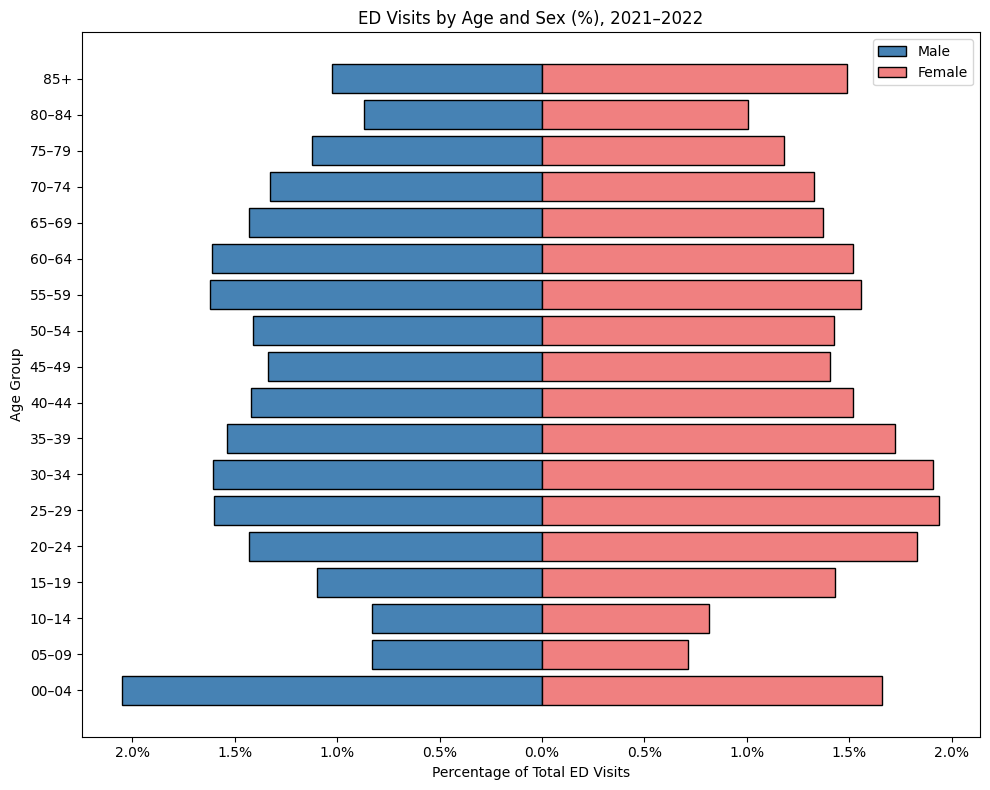

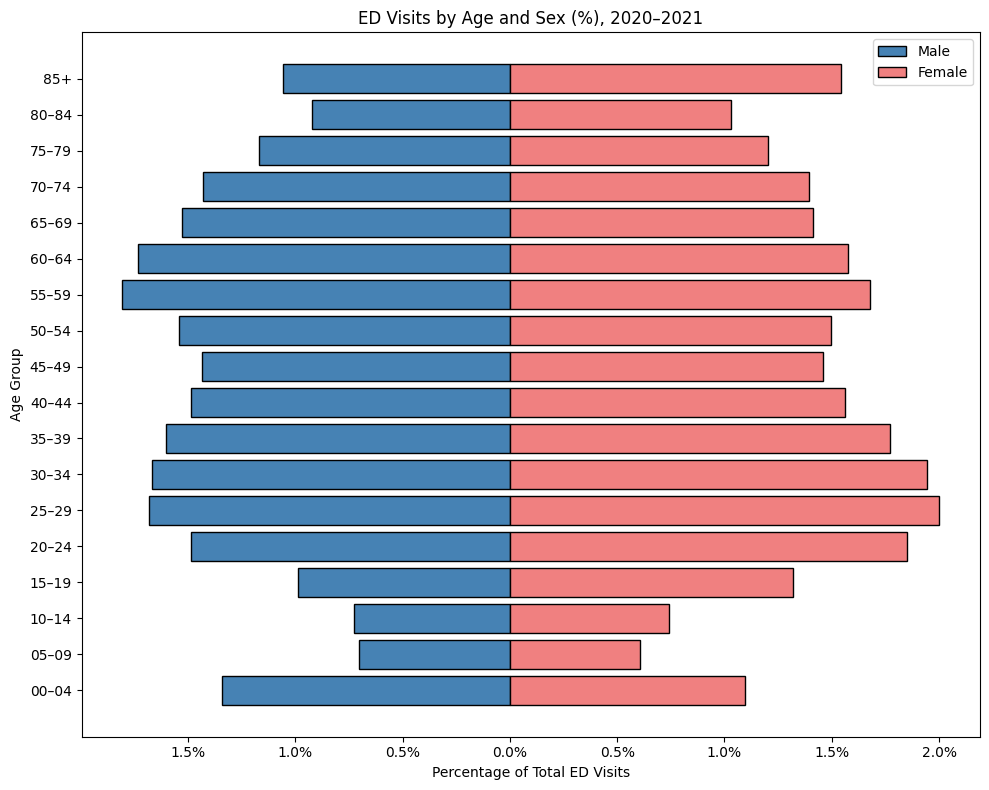

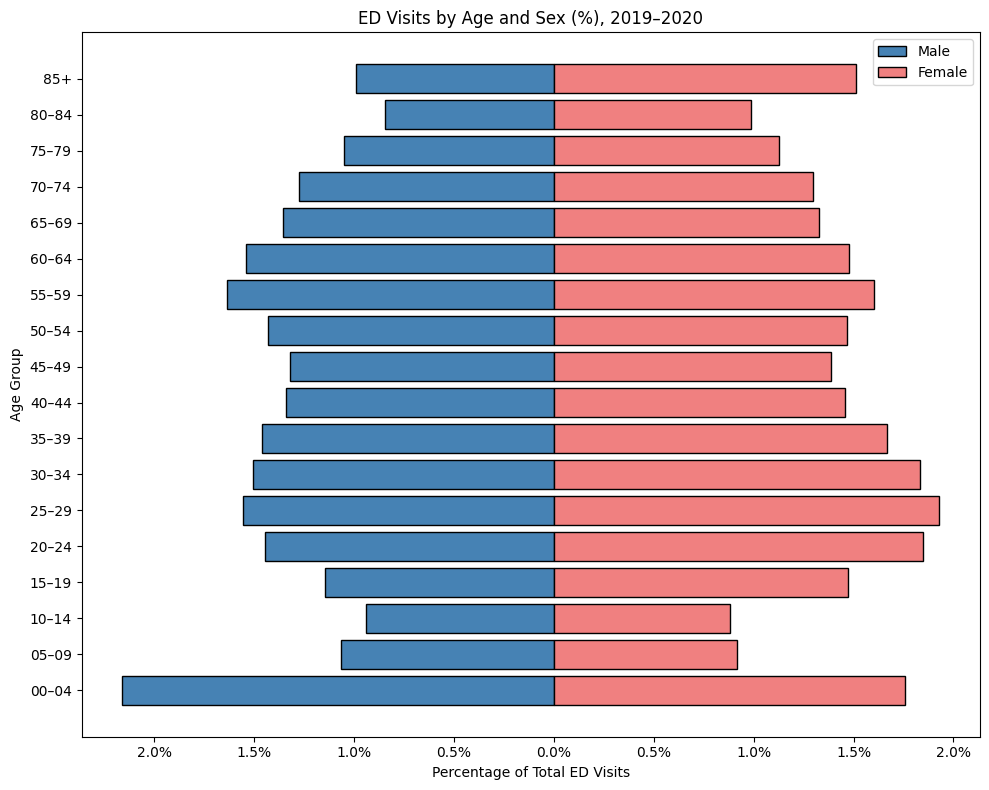

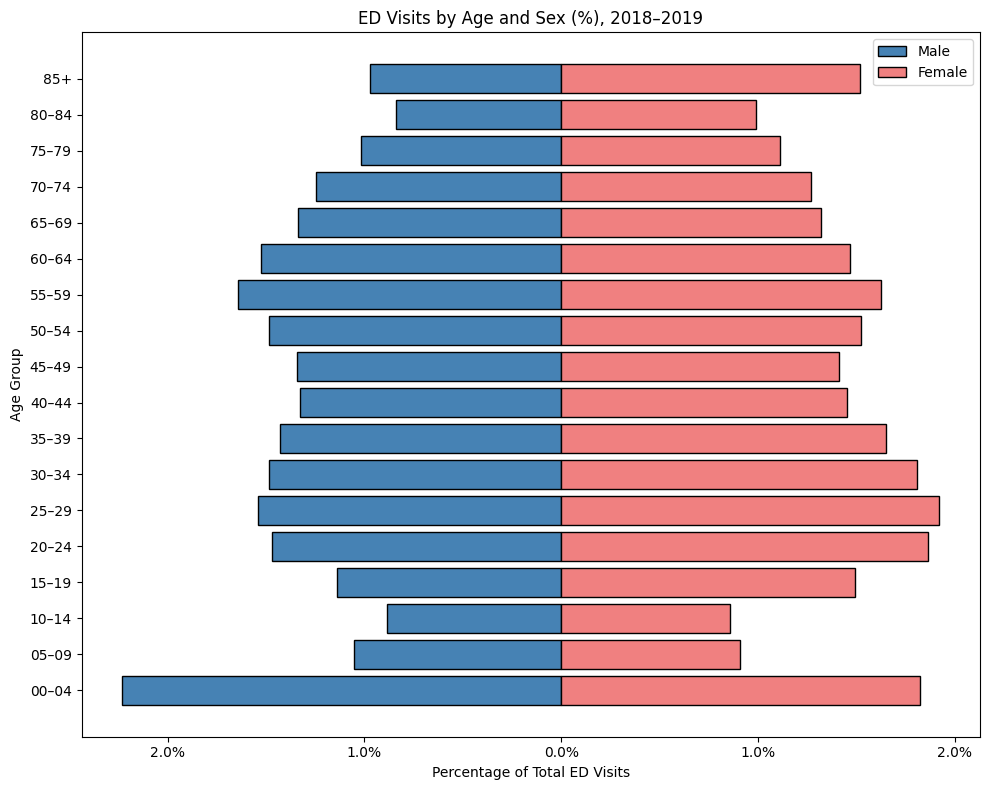

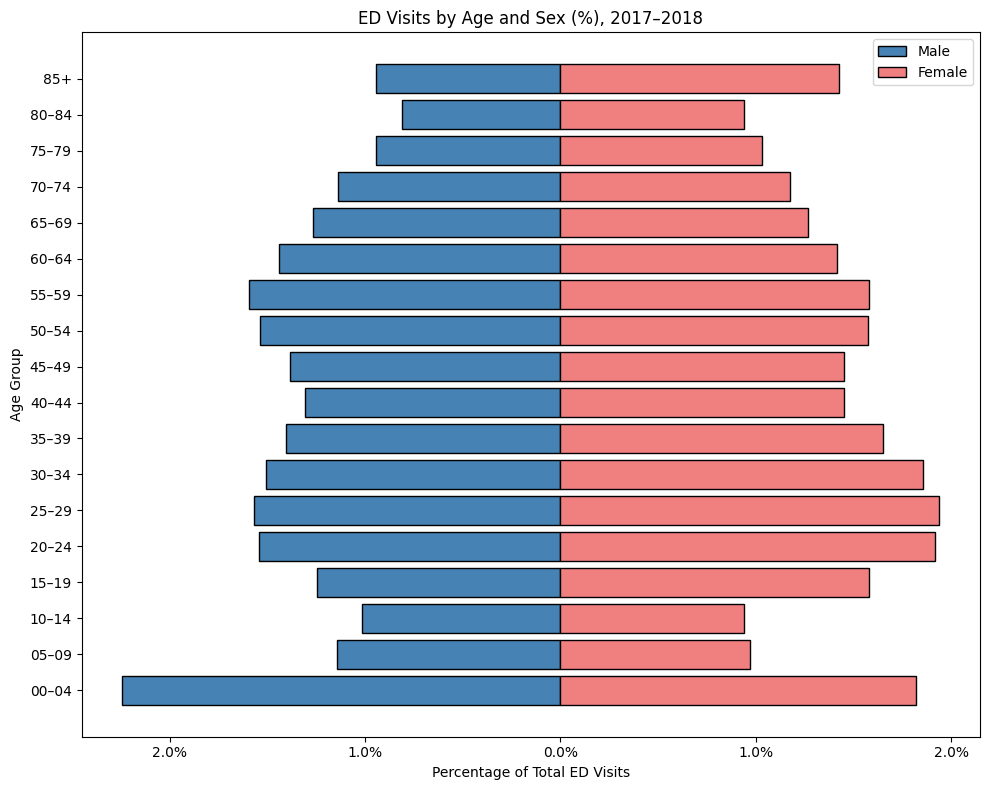

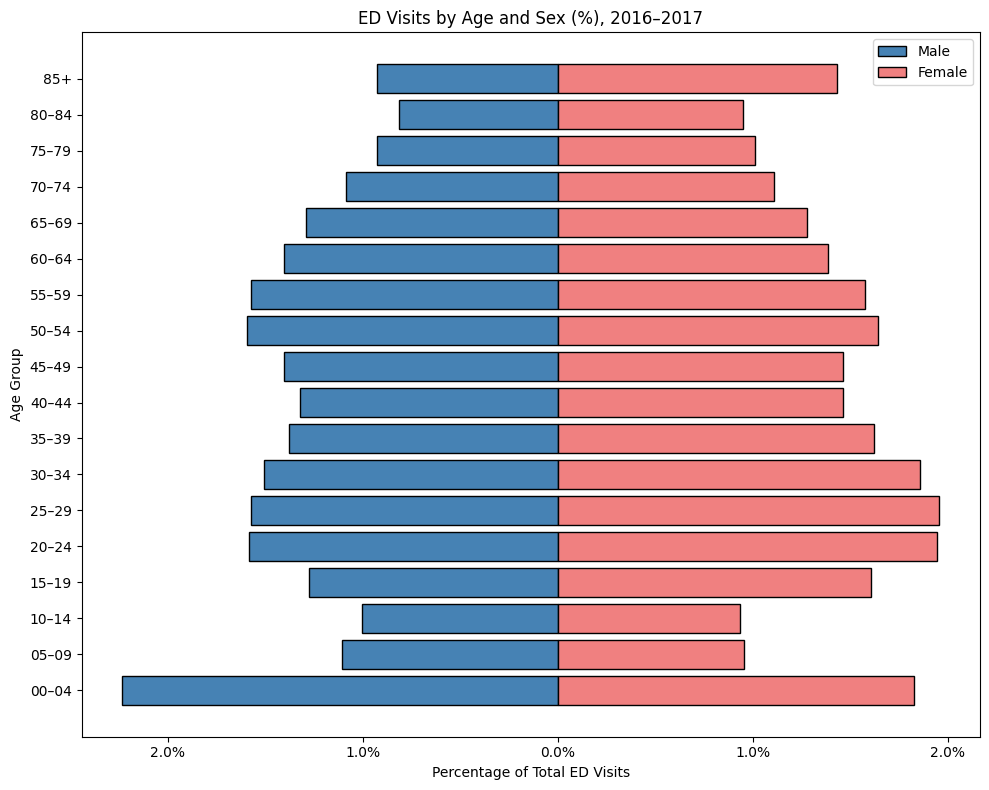

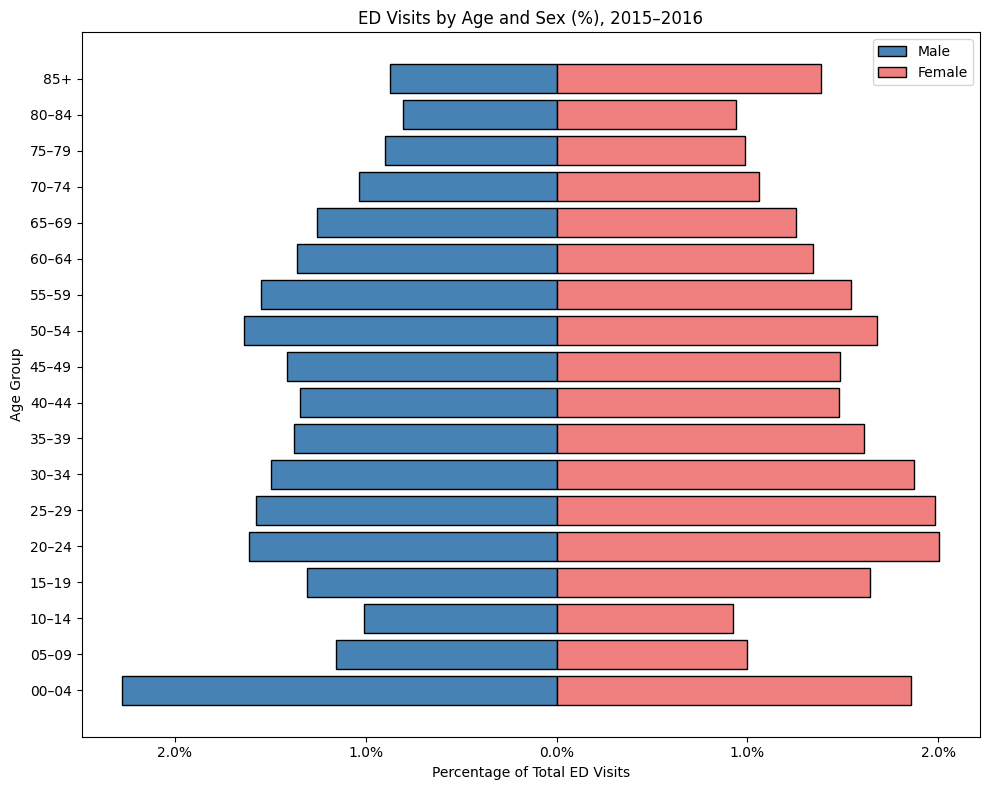

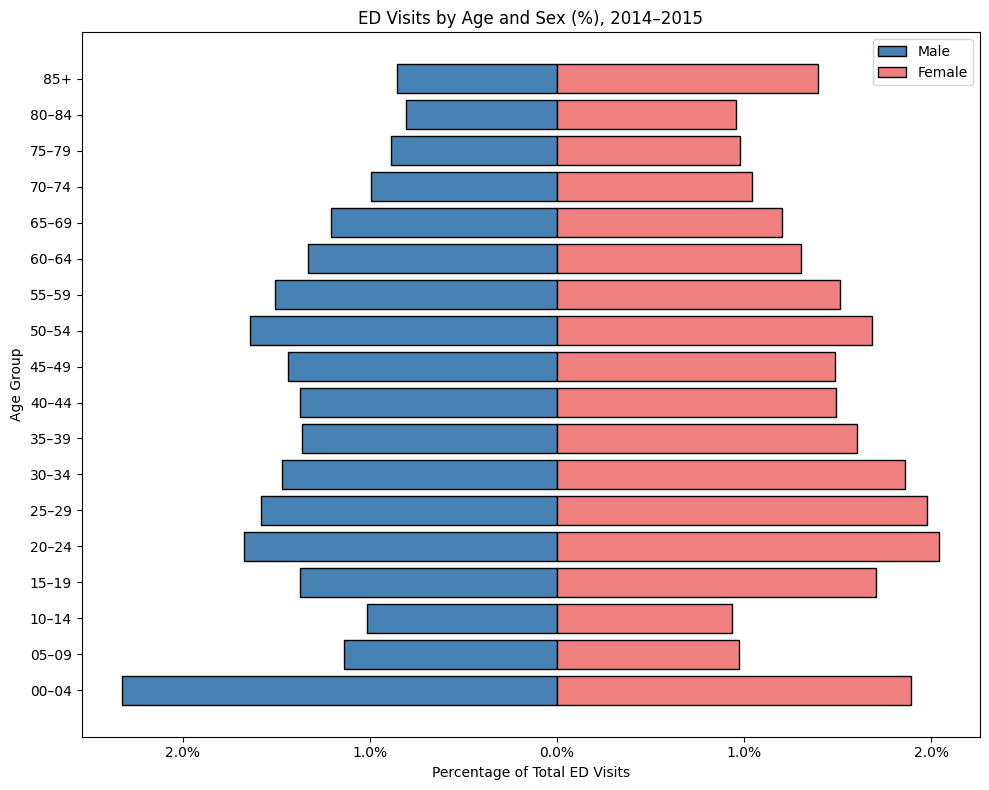

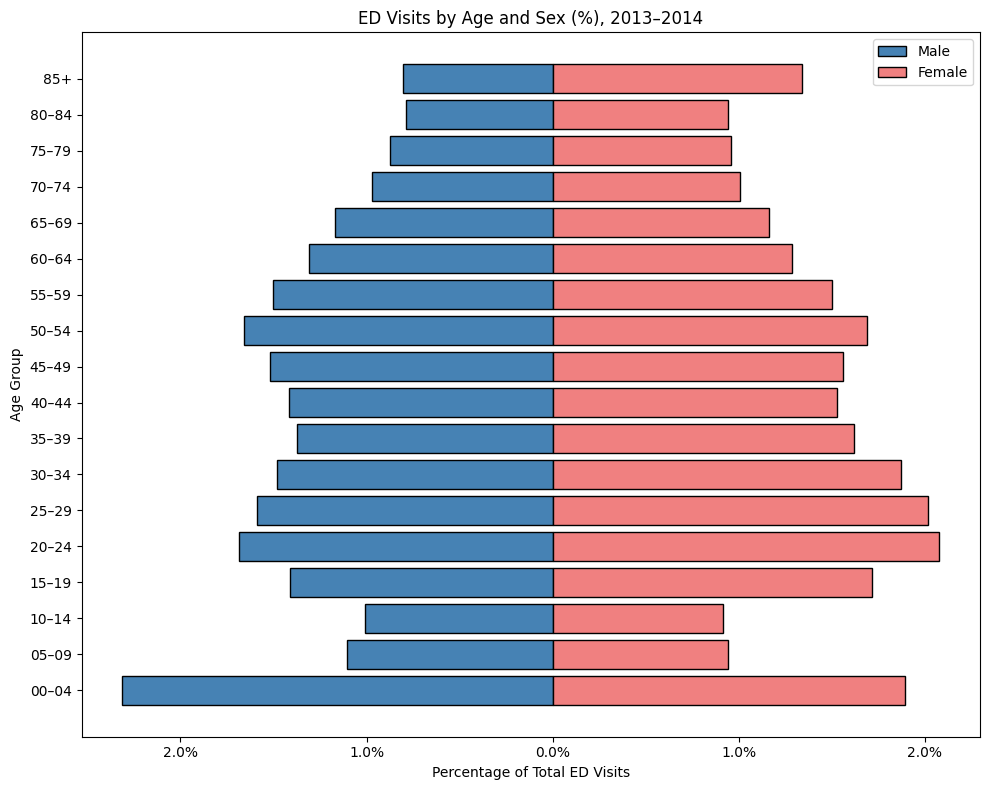

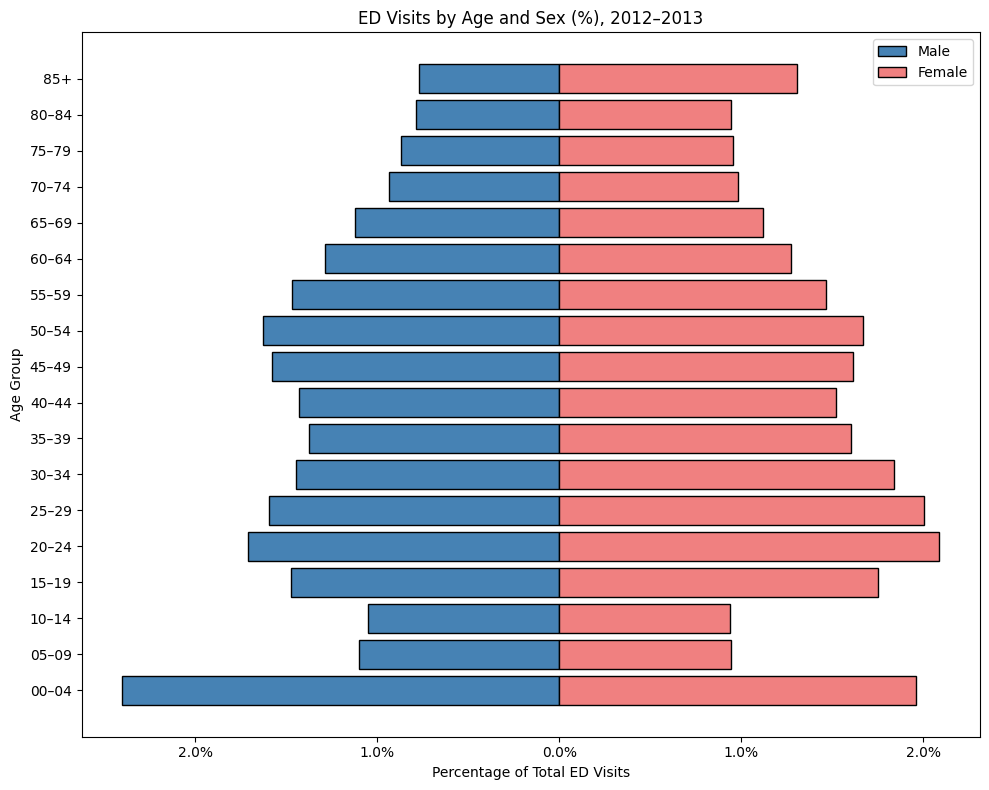

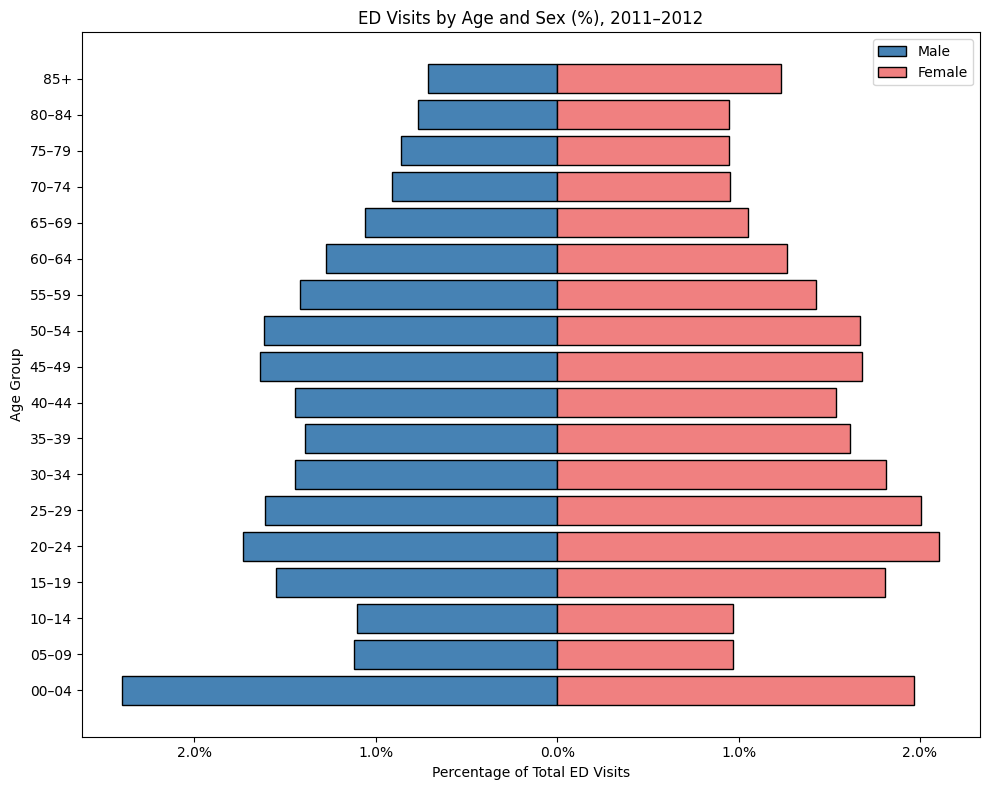

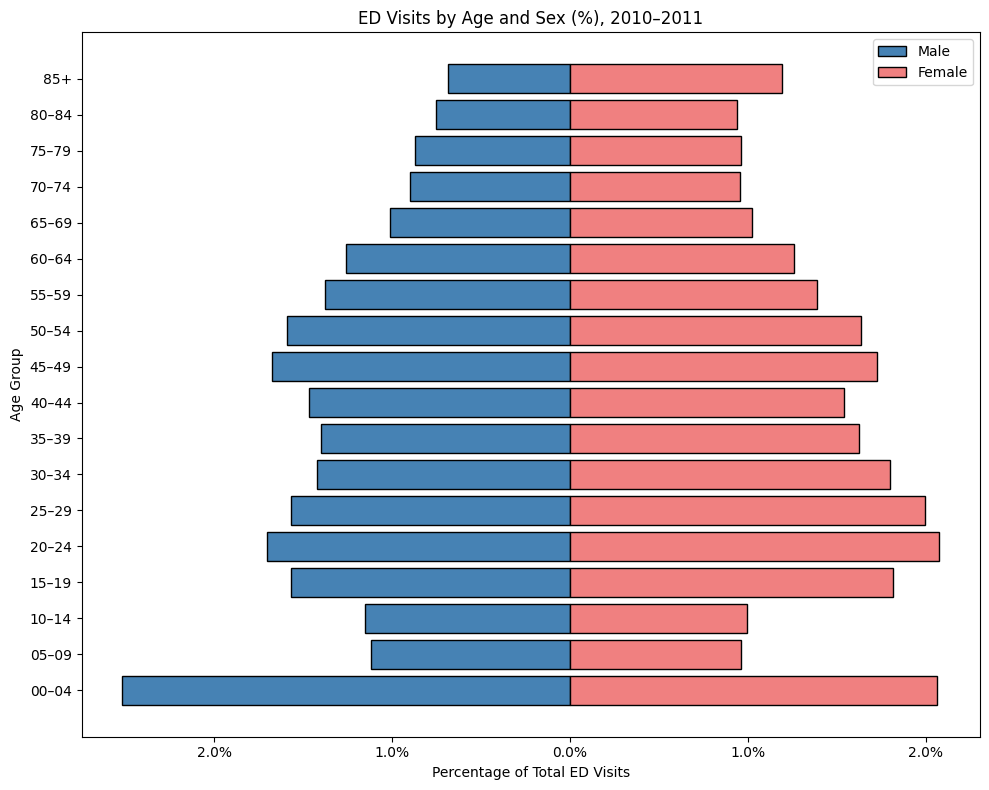

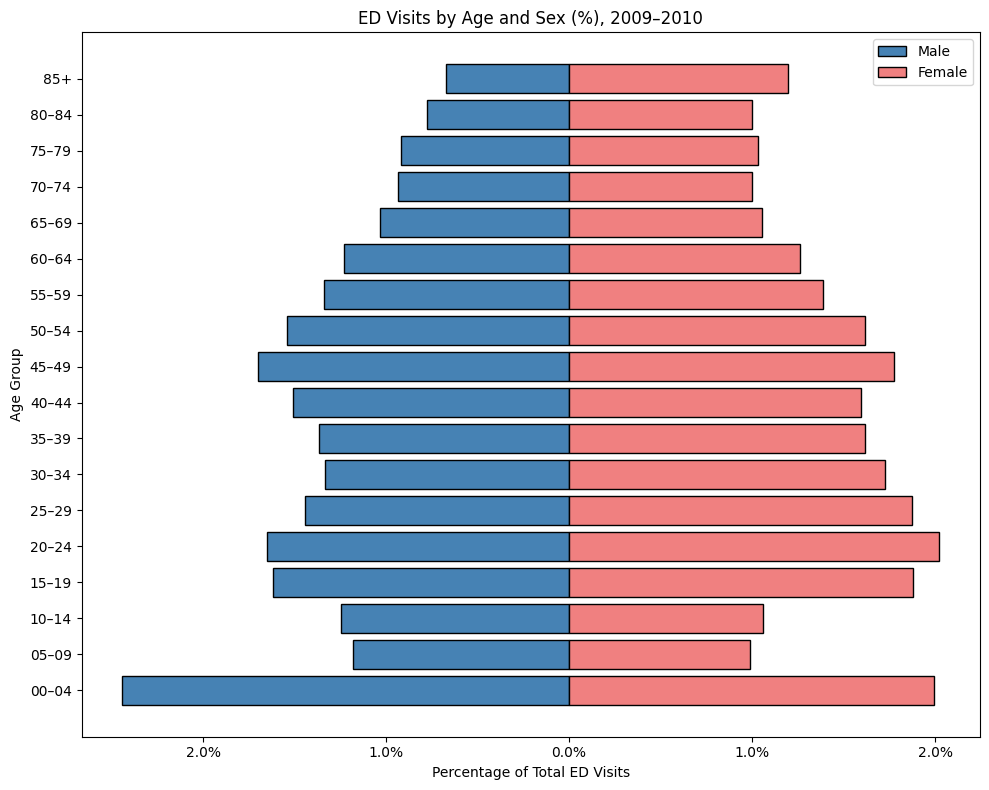

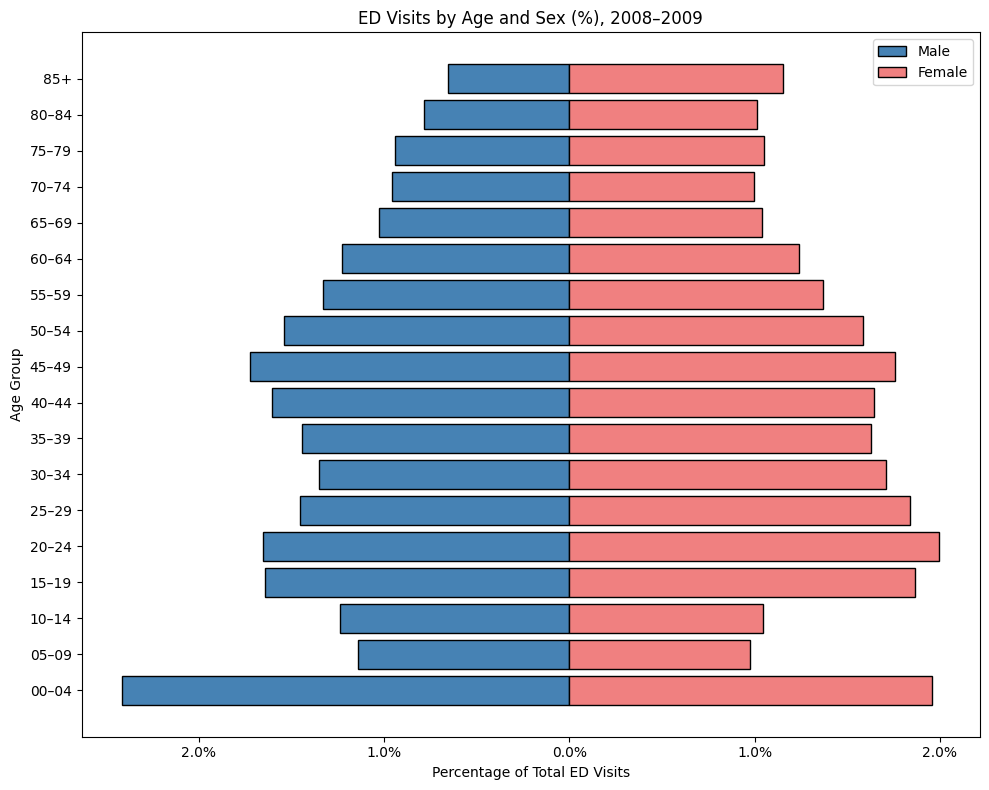

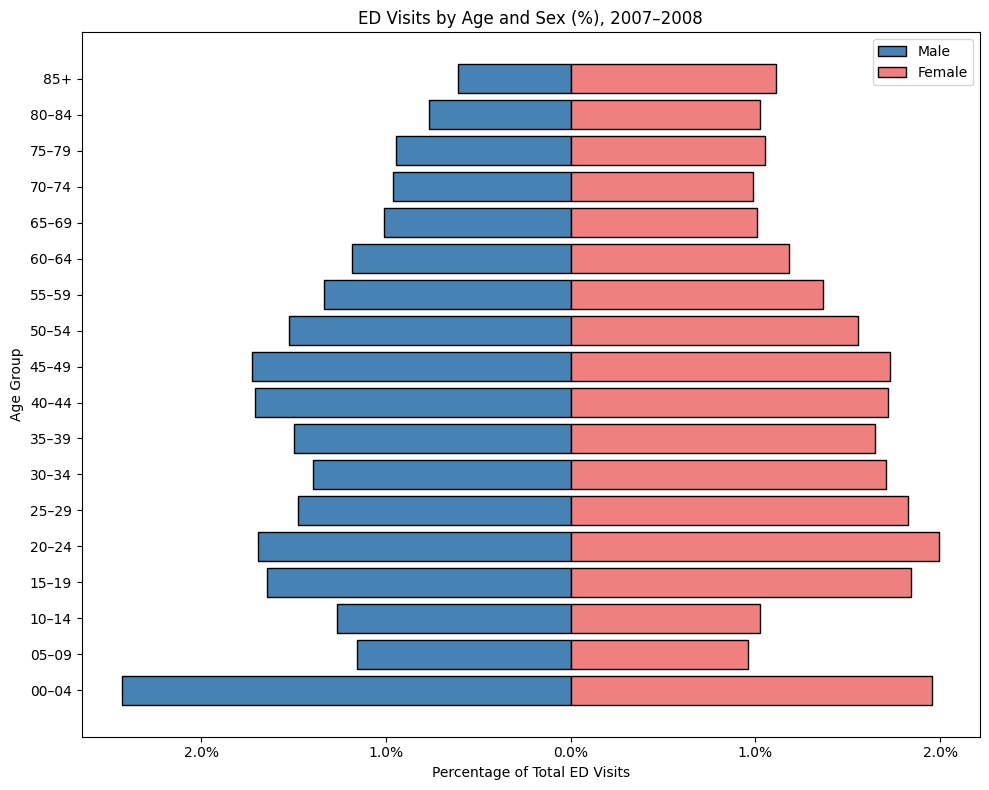

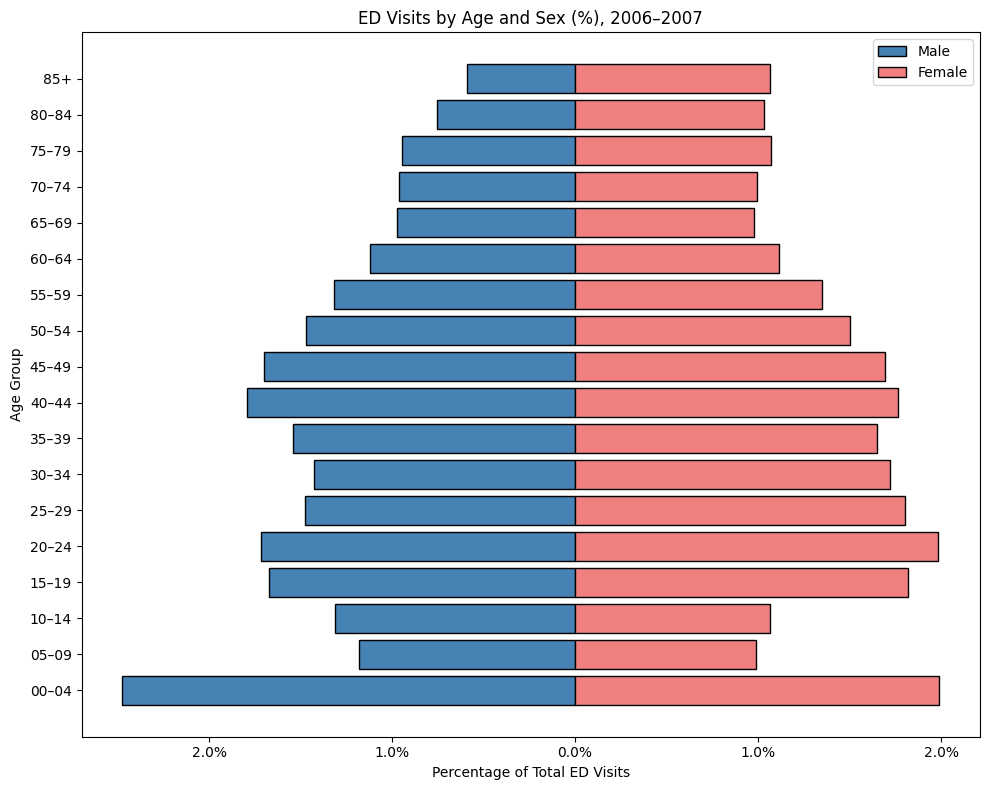

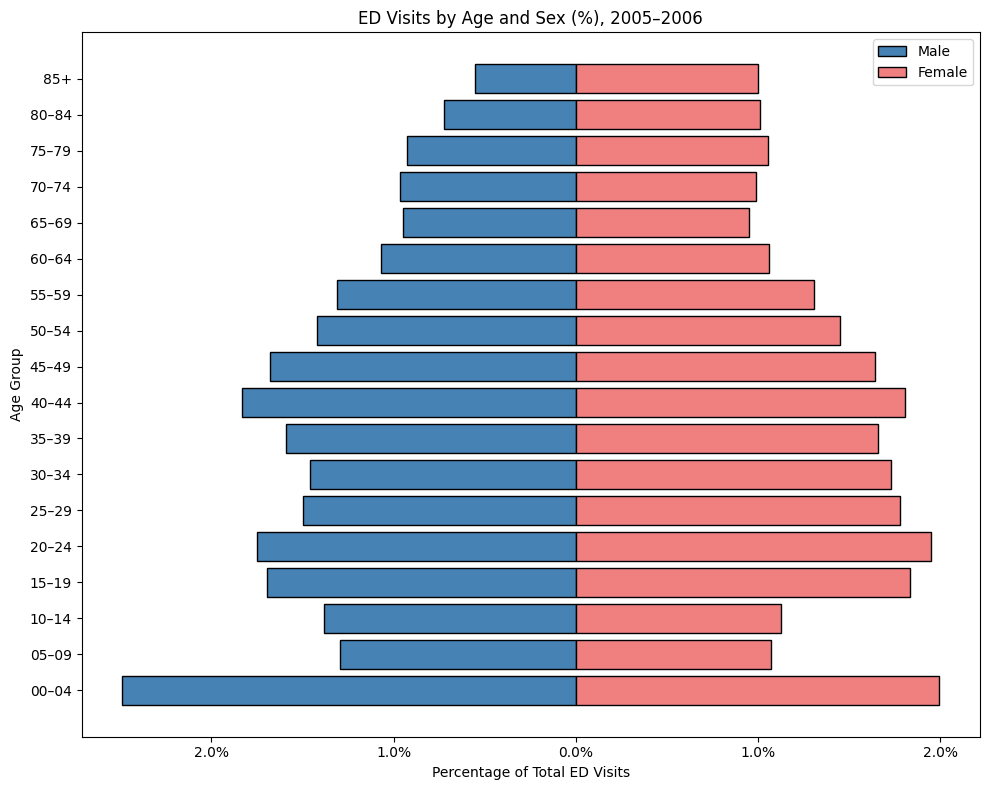

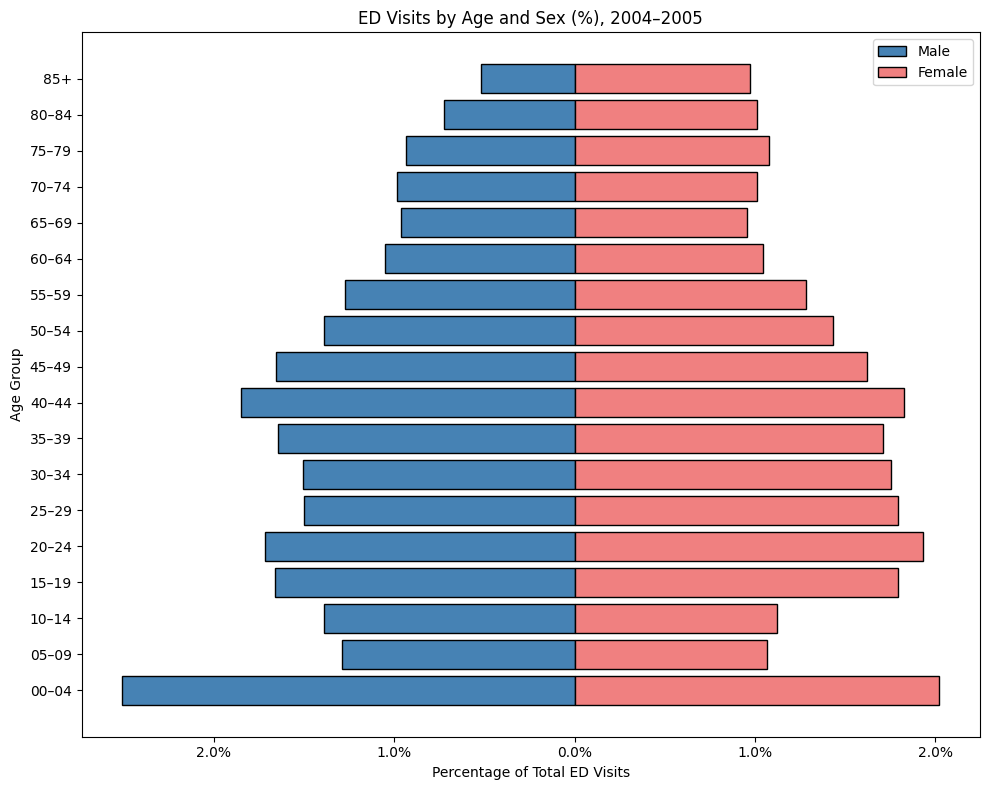

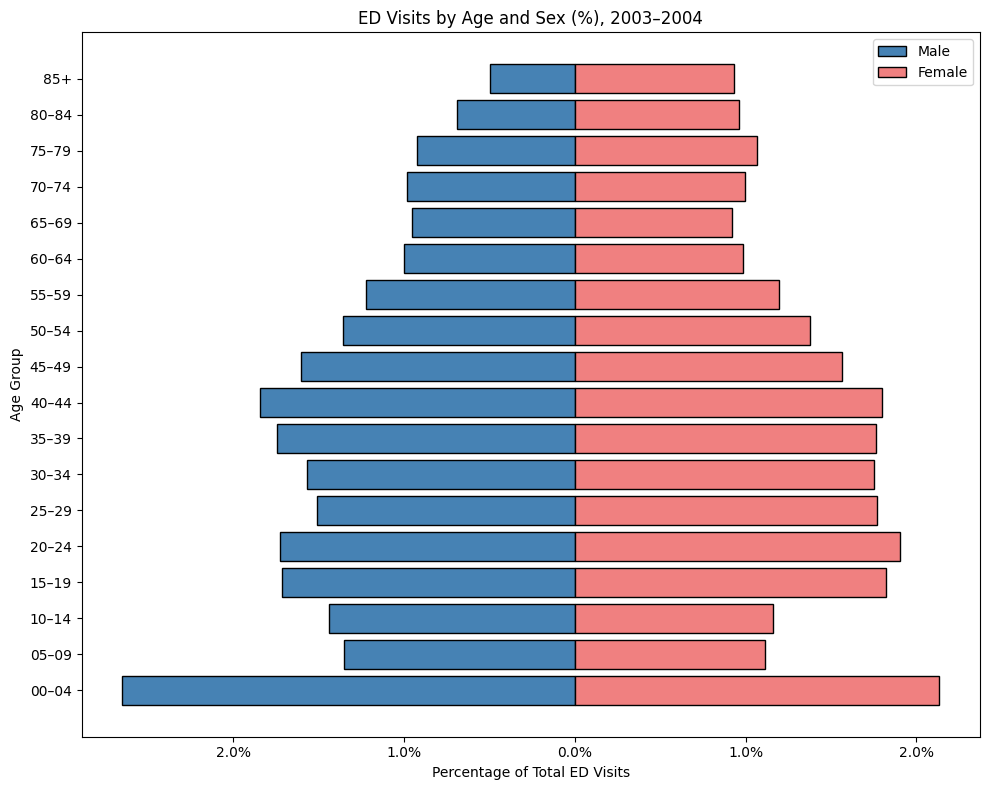

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Calculate percentages within each fiscal year
df1_clean["pct_of_total"] = (
    df1_clean.groupby("fiscal_year")["number_of_ed_visits"]
             .transform(lambda x: x / x.sum() * 100)
)

# Step 2: Get list of fiscal years
years = df1_clean["fiscal_year"].unique()

# Optional: consistent age group order
age_order = [
    "00–04", "05–09", "10–14", "15–19", "20–24", "25–29", "30–34", "35–39",
    "40–44", "45–49", "50–54", "55–59", "60–64", "65–69", "70–74", "75–79",
    "80–84", "85+"
]

# Step 3: Plot each fiscal year
for year in years:
    df_plot = df1_clean[
        (df1_clean["fiscal_year"] == year) & (df1_clean["sex"] != "All")
    ].copy()

    # Pivot to wide format
    df_pivot = df_plot.pivot(
        index="age_group", columns="sex", values="pct_of_total"
    ).fillna(0)

    # Reorder age groups
    df_pivot = df_pivot.reindex(age_order)

    # Make males negative for left-side plotting
    if "Male" in df_pivot.columns:
        df_pivot["Male"] = -df_pivot["Male"]

    # Step 4: Plot pyramid
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.barh(df_pivot.index, df_pivot.get("Male", 0), color="steelblue", label="Male",edgecolor="black")
    ax.barh(df_pivot.index, df_pivot.get("Female", 0), color="lightcoral", label="Female",edgecolor="black")

    # Formatting
    ax.set_xlabel("Percentage of Total ED Visits")
    ax.set_ylabel("Age Group")
    ax.set_title(f"ED Visits by Age and Sex (%), {year}")
    ax.legend()

    # Format x-axis as %
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{abs(x):.1f}%"))

    plt.tight_layout()
    plt.show()


Over the observation period, males consistently represent a larger share of the population in the younger age groups (0–14 years), while females tend to outnumber males in the older age groups (75 years and above)

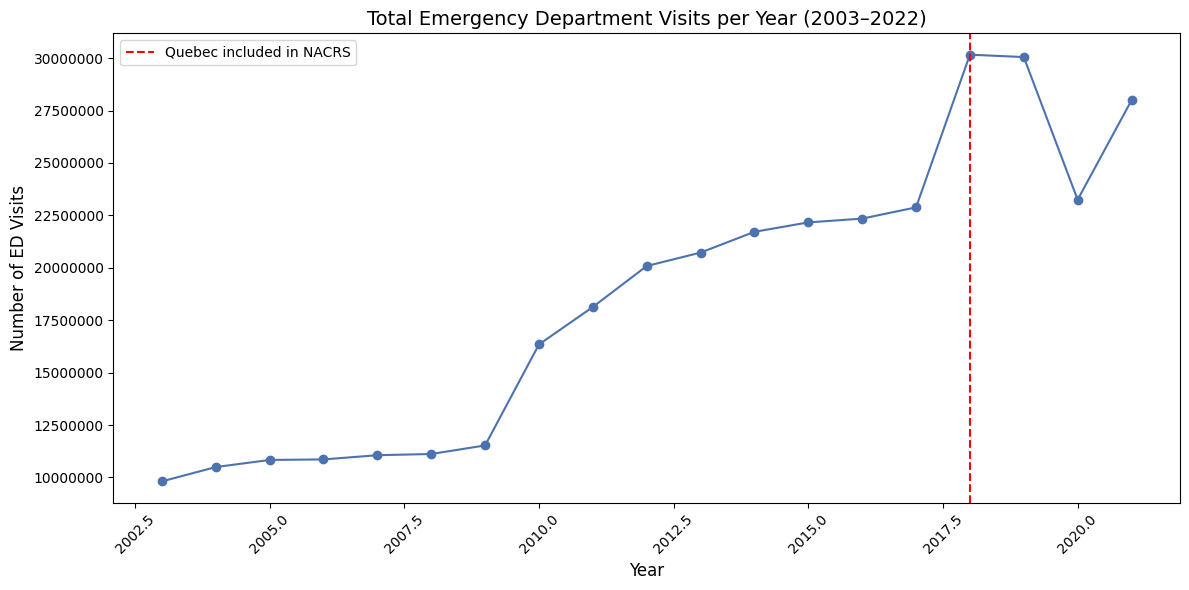

In [ ]:
# Overall ED Visit Trends
# Sum total ED visits per year (all sexes and age groups)
yearly_visits = df1_clean.groupby("year_start")["number_of_ed_visits"].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(yearly_visits["year_start"], yearly_visits["number_of_ed_visits"], marker="o", color="#4C72B0")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of ED Visits", fontsize=12)
plt.title("Total Emergency Department Visits per Year (2003–2022)", fontsize=14)
plt.ticklabel_format(style='plain', axis='y')  # show full integers
plt.xticks(rotation=45)

# Annotate Quebec inclusion
plt.axvline(x=2018, color='red', linestyle='--', label='Quebec included in NACRS')
plt.legend()

plt.tight_layout()
plt.show()

From 2003 to 2017, the number of emergency department visits in Canada increased gradually from approximately 9.8 million to 22.9 million. In 2018–2019, there was a substantial rise in reported visits, coinciding with the inclusion of Quebec data in NACRS. The number of visits decreased in 2020 to 23.2 million, likely reflecting the impact of the COVID-19 pandemic, and partially rebounded to 28.0 million in 2021.

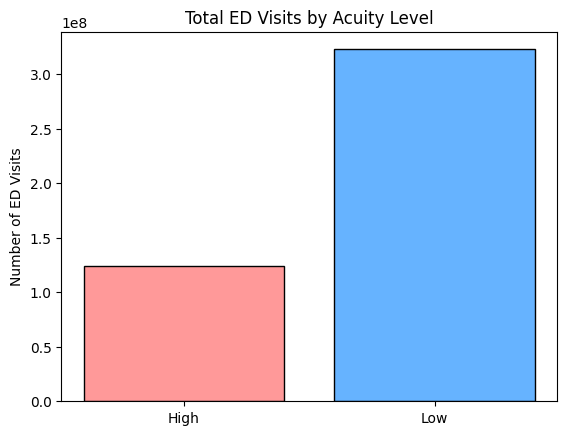

In [ ]:
# Acuity Analysis (How urgent/emergent cases affect LOS and visit volume)

# Define mapping from triage_level to acuity
high_acuity_levels = ["Resuscitation", "Emergent", "Urgent"]

df5_clean["high_acuity_flag"] = df5_clean["triage_level"].apply(
    lambda x: "High" if x in high_acuity_levels else "Low"
)

high_acuity_visits = df5_clean.groupby("high_acuity_flag")["number_of_ed_visits"].sum()

# Plot
plt.bar(high_acuity_visits.index, high_acuity_visits.values, color=["#ff9999","#66b3ff"], edgecolor="black")
plt.title("Total ED Visits by Acuity Level")
plt.ylabel("Number of ED Visits")
plt.show()


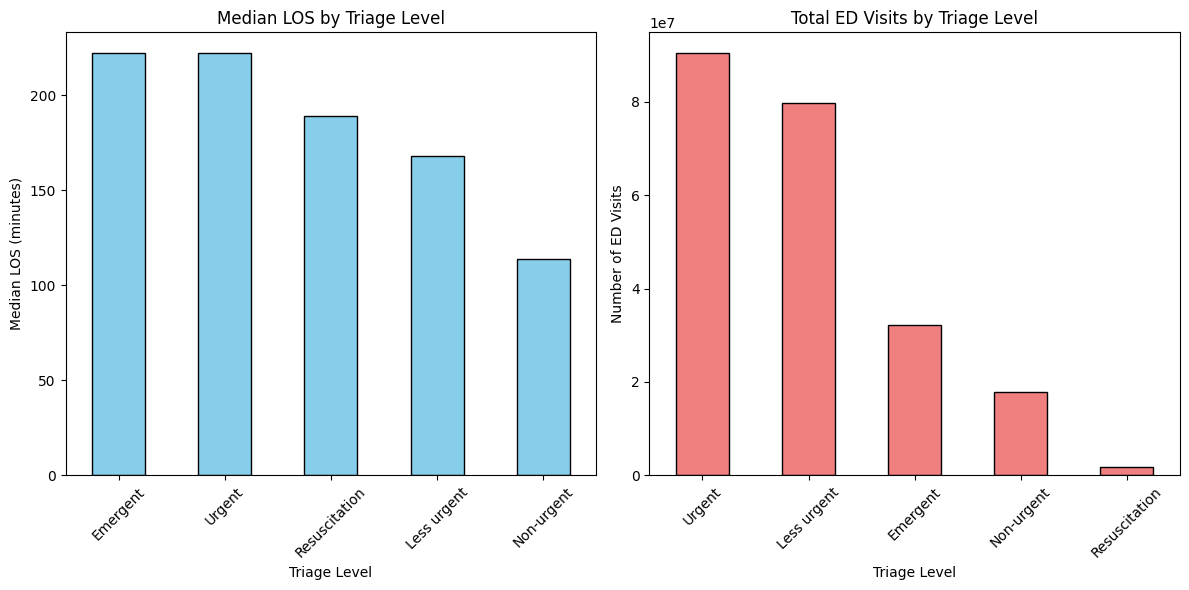

In [ ]:
# Filter valid triage levels
valid_triage = ["Resuscitation", "Emergent", "Urgent", "Less urgent", "Non-urgent"]
df_triage = df5_clean[df5_clean["triage_level"].isin(valid_triage)]

# Median LOS by triage level
los_triage = (
    df_triage.groupby("triage_level")["median_length_of_stay_minutes"]
    .median()
    .sort_values(ascending=False)
)

# Total ED visits by triage level
visits_triage = (
    df_triage.groupby("triage_level")["number_of_ed_visits"]
    .sum()
    .loc[los_triage.index]
    .sort_values(ascending=False)
)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot LOS
los_triage.plot(kind="bar", ax=axes[0], color="skyblue", edgecolor="black")
axes[0].set_title("Median LOS by Triage Level")
axes[0].set_ylabel("Median LOS (minutes)")
axes[0].set_xlabel("Triage Level")
axes[0].tick_params(axis="x", rotation=45)

# Plot total visits
visits_triage.plot(kind="bar", ax=axes[1], color="lightcoral", edgecolor="black")
axes[1].set_title("Total ED Visits by Triage Level")
axes[1].set_ylabel("Number of ED Visits")
axes[1].set_xlabel("Triage Level")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


Analysis of emergency department visits by acuity level shows that Urgent cases had the highest volume at approximately 90 million visits, followed by Less Urgent cases, while Resuscitation cases were the least frequent. When examining median length of stay (LOS), higher-acuity cases required substantially more time in the ED: Emergent and Urgent visits had a median LOS exceeding 280 minutes, compared to around 120 minutes for Non-Urgent visits. This pattern indicates that although high-acuity cases are fewer in number, they demand significantly more resources and time per visit, emphasizing the impact of case severity on ED operations.

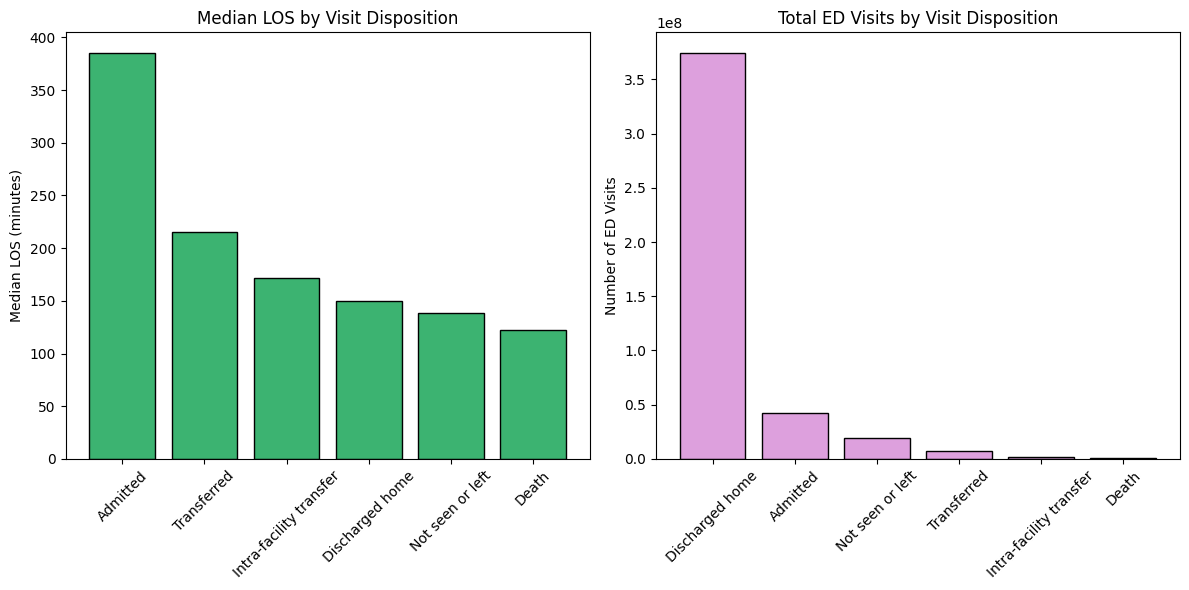

In [ ]:
# Visit Disposition Analysis (Resource utilization, admission patterns, and LOS differences.0)
# Remove unwanted categories
valid_dispositions = df5_clean.loc[
    ~df5_clean["visit_disposition"].str.lower().isin(["unknown", "total"])
]

# Median LOS by visit disposition (use valid_dispositions, not df5_clean)
los_disposition = (
    valid_dispositions.groupby("visit_disposition")["median_length_of_stay_minutes"]
    .median()
    .sort_values(ascending=False)
)

# Total visits by disposition
visits_disposition = (
    valid_dispositions.groupby("visit_disposition")["number_of_ed_visits"]
    .sum()
    .sort_values(ascending=False)
)

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 2 rows, 1 column

# Plot 1
axes[0].bar(los_disposition.index, los_disposition.values,
            color="mediumseagreen", edgecolor="black")
axes[0].set_title("Median LOS by Visit Disposition")
axes[0].set_ylabel("Median LOS (minutes)")
axes[0].tick_params(axis="x", rotation=45)

# Plot 2
axes[1].bar(visits_disposition.index, visits_disposition.values,
            color="plum", edgecolor="black")
axes[1].set_title("Total ED Visits by Visit Disposition")
axes[1].set_ylabel("Number of ED Visits")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

Emergency department visit patterns vary significantly by disposition. Patients who were admitted had the longest median length of stay (LOS) at approximately 380 minutes, followed by those who were transferred, approximately 220 minutes,
while visits ending in death had the shortest median LOS, approximately 125 minutes. In terms of visit volume, the majority of patients were discharged home approximately 380 million visits, whereas deaths were the least frequent outcome. These findings indicate that higher-acuity dispositions, such as admissions and transfers, are associated with longer resource utilization, whereas lower-acuity dispositions, such as discharge, account for the largest proportion of visits.

/tmp/ipython-input-3999443333.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_problems.index, rotation=45, ha="right")


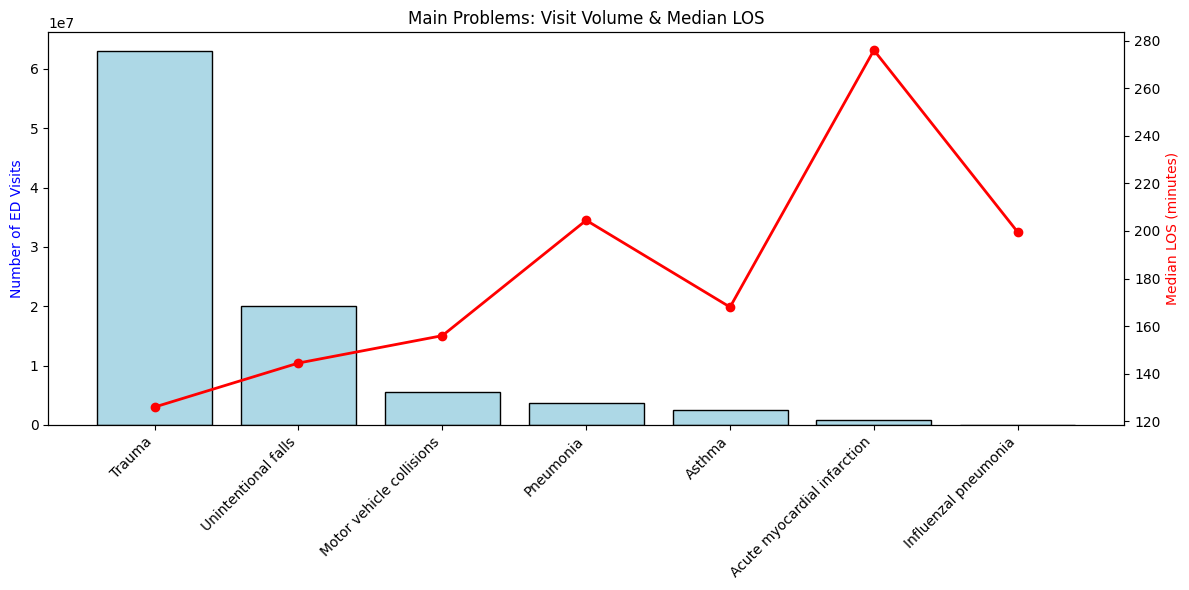

In [ ]:
# --- Frequency of ED problems ---
top_problems = (
    df4_clean.groupby("main_problem")["number_of_ed_visits"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# --- Median LOS for those top problems ---
los_problems = (
    df4_clean[df4_clean["main_problem"].isin(top_problems.index)]
    .groupby("main_problem")["median_length_of_stay_minutes"]
    .median()
    .reindex(top_problems.index)
)
# --- Plot ---
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# bar for visits
ax1.bar(top_problems.index, top_problems.values, color="lightblue", edgecolor="black")
ax1.set_ylabel("Number of ED Visits", color="blue")
ax1.set_xticklabels(top_problems.index, rotation=45, ha="right")

# secondary axis for LOS
ax2 = ax1.twinx()
ax2.plot(los_problems.index, los_problems.values, color="red", marker="o", linewidth=2)
ax2.set_ylabel("Median LOS (minutes)", color="red")

plt.title("Main Problems: Visit Volume & Median LOS")
plt.tight_layout()
plt.show()


Emergency department visits were analyzed by main presenting problem, considering both visit volume and median length of stay (LOS). Trauma accounted for the highest number of visits (approximately 70 million) but had a relatively short median LOS of approximately 130 minutes. Unintentional falls were the next most frequent (approximately 20 million visits) with a median LOS of ~140 minutes. In contrast, Acute Myocardial Infarction (AMI) had a relatively low visit volume, ranking second-last among the conditions, but required a substantially longer median LOS of ~280 minutes. This indicates that while high-frequency conditions such as trauma and falls are less resource-intensive per visit, less frequent but severe conditions like AMI demand significantly more ED resources per patient

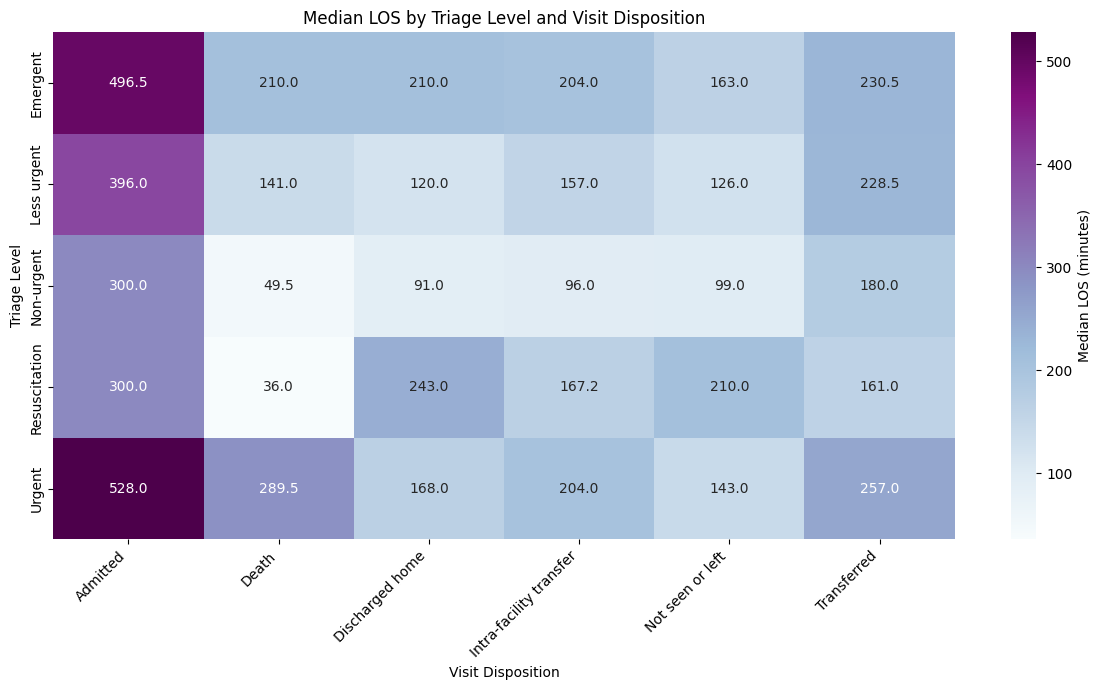

In [ ]:
# Combination of triage level and visit disposition and their effect on LOS

# Filter out unwanted categories
df_heat = df5_clean.loc[
    ~df5_clean["triage_level"].str.lower().isin(["unknown", "total"]) &
    ~df5_clean["visit_disposition"].str.lower().isin(["unknown", "total"])
]

# Median LOS by triage level + visit disposition
heatmap_data = (
    df_heat.groupby(["triage_level", "visit_disposition"])["median_length_of_stay_minutes"]
    .median()
    .unstack()
)

# Gradient heatmap
plt.figure(figsize=(12,7))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="BuPu",
    cbar_kws={'label': 'Median LOS (minutes)'}
)
plt.title("Median LOS by Triage Level and Visit Disposition")
plt.ylabel("Triage Level")
plt.xlabel("Visit Disposition")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Analysis of emergency department length of stay (LOS) by triage level and visit disposition reveals that higher-acuity visits generally require more time when admitted. Patients categorized as Urgent and Emergent who were admitted had the longest median LOS, at 528 minutes and 496.5 minutes, respectively, followed by Less Urgent admissions (approximately 396 minutes). Non-Urgent and Resuscitation admissions had shorter median LOS (approximately 300 minutes). Among other dispositions, Urgent deaths had a median LOS of 289.5 minutes, while Urgent transfers had a median LOS of 257 minutes. This pattern indicates that both triage acuity and disposition strongly influence ED resource utilization, with high-acuity admissions requiring the most time.

**Age- and Sex-Stratified ED Utilization**

Question 1:

Which age and sex groups account for the highest number of ED visits, and how does this vary by main problem?

In [ ]:
# Filter "Total" and "Unknown" categories
df_stat = df4_clean.loc[
    ~df4_clean["age_group"].str.lower().isin(["total", "unknown"]) &
    ~df4_clean["sex"].str.lower().isin(["all", "unknown"])
]

In [ ]:
# Sum visits
visits_by_age_sex_problem = (
    df_stat.groupby(["age_group", "sex", "main_problem"])["number_of_ed_visits"]
    .sum()
    .reset_index()
)

# Median LOS by group
los_by_age_sex_problem = (
    df_stat.groupby(["age_group", "sex", "main_problem"])["median_length_of_stay_minutes"]
    .median()
    .reset_index()
)

In [ ]:
# Identify top problems
top_problems = visits_by_age_sex_problem.groupby("main_problem")["number_of_ed_visits"]\
                .sum().sort_values(ascending=False).head(10).index

df_top = visits_by_age_sex_problem[visits_by_age_sex_problem["main_problem"].isin(top_problems)]


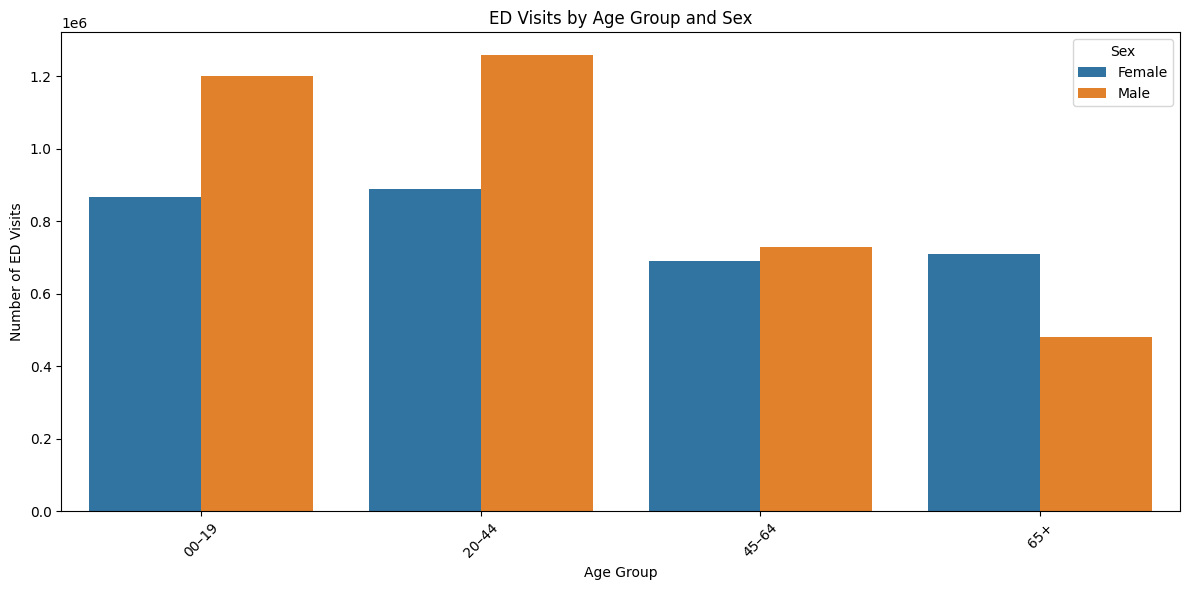

In [ ]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_top,
    x="age_group",
    y="number_of_ed_visits",
    hue="sex",
    errorbar=None
)
plt.title("ED Visits by Age Group and Sex")
plt.ylabel("Number of ED Visits")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4030529150.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


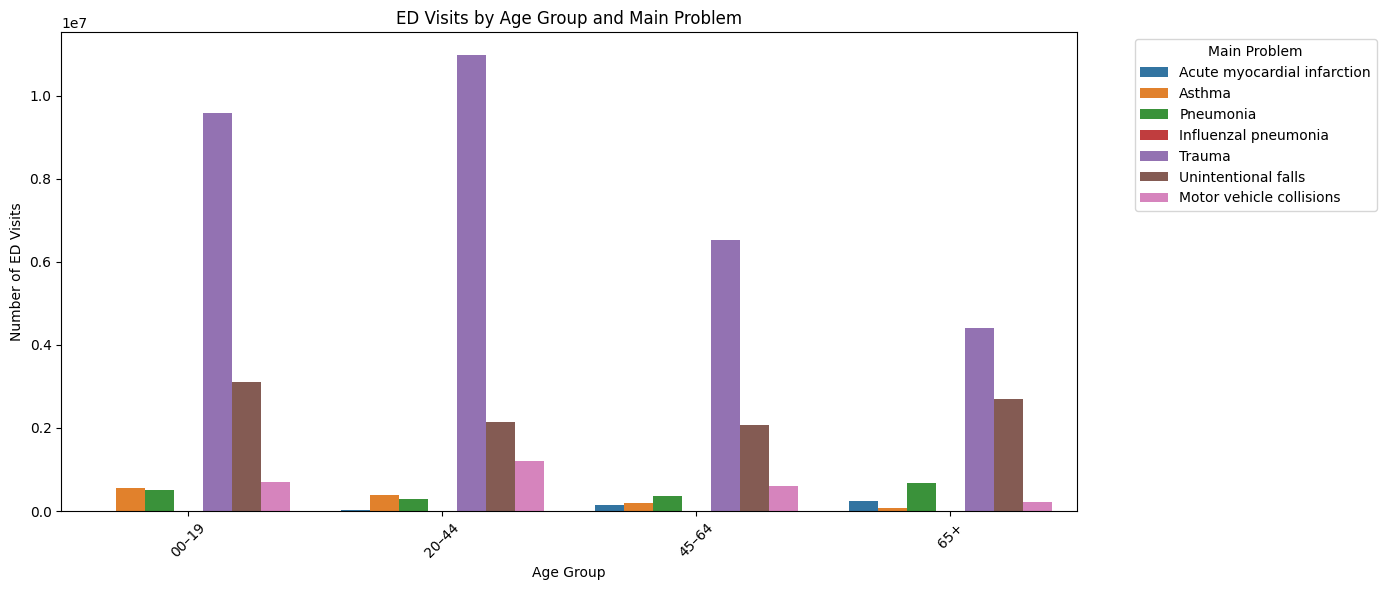

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 10 problems
top_problems = df4_clean.groupby("main_problem")["number_of_ed_visits"].sum().sort_values(ascending=False).head(10).index
df_top = df4_clean[df4_clean["main_problem"].isin(top_problems)]

# Exclude totals/unknown
df_top = df_top.loc[
    ~df_top["age_group"].str.lower().isin(["total", "unknown"]) &
    ~df_top["sex"].str.lower().isin(["all", "unknown"])
]

# Plot
plt.figure(figsize=(14,6))
sns.barplot(
    data=df_top,
    x="age_group",
    y="number_of_ed_visits",
    hue="main_problem",
    estimator=sum,
    ci=None
)
plt.title("ED Visits by Age Group and Main Problem")
plt.ylabel("Number of ED Visits")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Main Problem", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Filter out totals/unknowns
df_top = df4_clean.loc[
    ~df4_clean["age_group"].str.lower().isin(["total", "unknown"]) &
    ~df4_clean["sex"].str.lower().isin(["all", "unknown"])
]

# Step 2: Select top 10 main problems by total ED visits
top_problems = df_top.groupby("main_problem")["number_of_ed_visits"]\
                .sum().sort_values(ascending=False).head(10).index

df_top = df_top[df_top["main_problem"].isin(top_problems)]

# Step 3: Aggregate by age, sex, and main_problem
df_agg = df_top.groupby(["age_group", "sex", "main_problem"])["number_of_ed_visits"]\
               .sum().reset_index()

# Check
df_agg.head()


,age_group,sex,main_problem,number_of_ed_visits
0,00–19,Female,Acute myocardial infarction,15.0
1,00–19,Female,Asthma,215821.0
2,00–19,Female,Influenzal pneumonia,3014.0
3,00–19,Female,Motor vehicle collisions,276816.0
4,00–19,Female,Pneumonia,222753.0


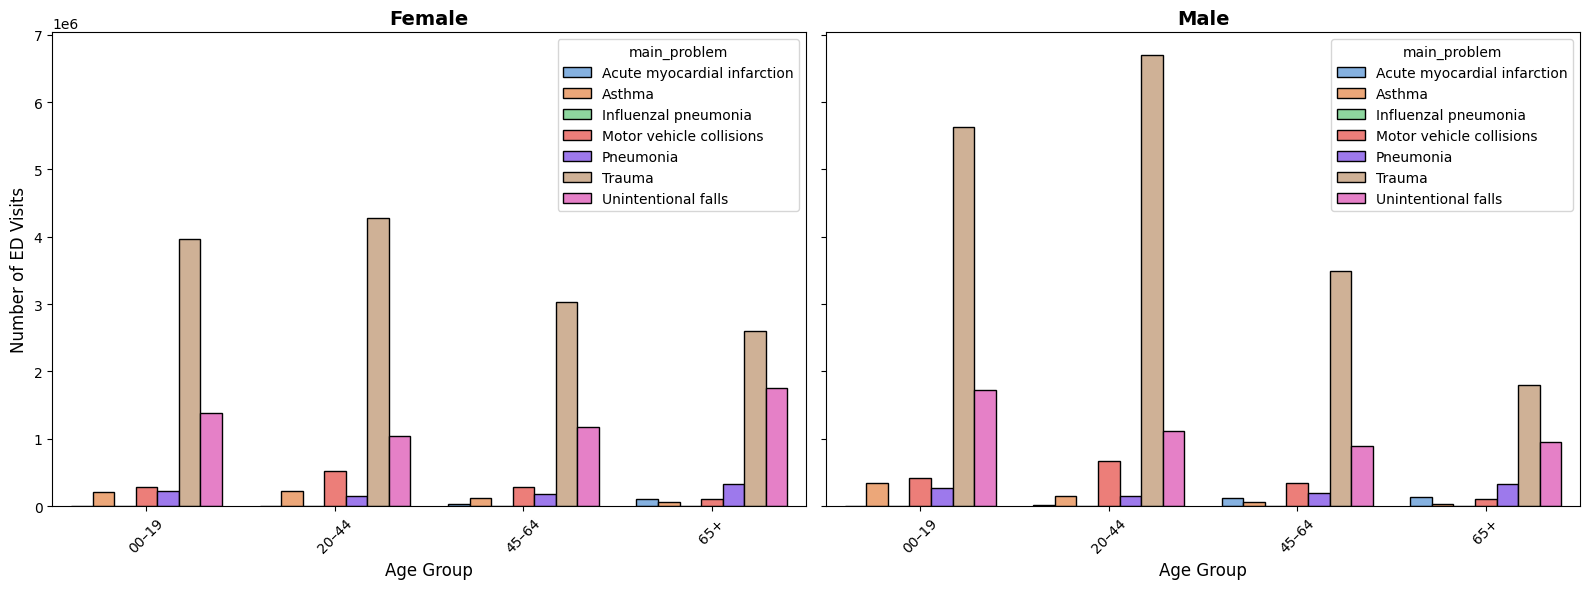

In [ ]:
# Prepare LOS data
los_agg = df_top.groupby(["age_group", "sex", "main_problem"])["median_length_of_stay_minutes"].median().reset_index()

# Merge ED visits and LOS
df_plot = pd.merge(df_agg, los_agg, on=["age_group", "sex", "main_problem"])

# Use slightly darker pastel colors
palette = sns.color_palette("pastel", n_colors=df_plot["main_problem"].nunique())
palette = [sns.set_hls_values(c, l=0.7) for c in palette]

# Plot faceted bar chart by sex
sexes = df_plot["sex"].unique()
fig, axes = plt.subplots(1, len(sexes), figsize=(16,6), sharey=True)

for i, sex in enumerate(sexes):
    ax = axes[i]
    df_sex = df_plot[df_plot["sex"] == sex]

    # Draw bars for ED visits
    sns.barplot(
        data=df_sex,
        x="age_group",
        y="number_of_ed_visits",
        hue="main_problem",
        palette=palette,
        ax=ax,
        edgecolor="black",
        estimator=sum,
        errorbar =None
    )


    ax.set_title(sex,fontsize=14, fontweight='bold')
    ax.set_xlabel("Age Group", fontsize=12)
    ax.set_ylabel("Number of ED Visits", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Analysis of emergency department utilization by age, sex, and main presenting problem indicates that the 20–44 age group accounts for the highest number of visits, with males visiting approximately 1.3 million times and females around 0.9 million. In older adults (65+), females visit the ED more frequently (approximately 0.7 million) than males (~0.5 million). Across all age groups, trauma is the most common presenting problem, particularly in the 20–44 age group, where males account for over 6.8 million visits and females for 4.2 million visits. Unintentional falls are more frequent among females aged 65+, whereas acute myocardial infarction primarily affects males aged 45+ and females aged 65+. Pneumonia visits are concentrated in the youngest (0–19) and oldest (65+) age groups, for both sexes. Motor vehicle collisions are most common in males aged 20–44. These patterns highlight that ED utilization varies substantially by age, sex, and presenting problem, reflecting differences in risk profiles and health needs across the population.

**Triage Level and LOS Patterns by Age and Sex**

Question 2:
•	How does median LOS vary by triage level across different age groups and sexes


In [ ]:
# Filter out totals/unknowns
df_triage = df2_clean.loc[
    (~df2_clean["triage_level"].str.lower().isin(["total", "unknown"])) &
    (~df2_clean["age_group"].str.lower().isin(["total", "unknown"])) &
    (~df2_clean["sex"].str.lower().isin(["all", "unknown"]))
].copy()


In [ ]:
# Aggregate median LOS
los_agg = df_triage.groupby(["triage_level", "age_group", "sex"])["median_length_of_stay_minutes"]\
                   .median().reset_index()


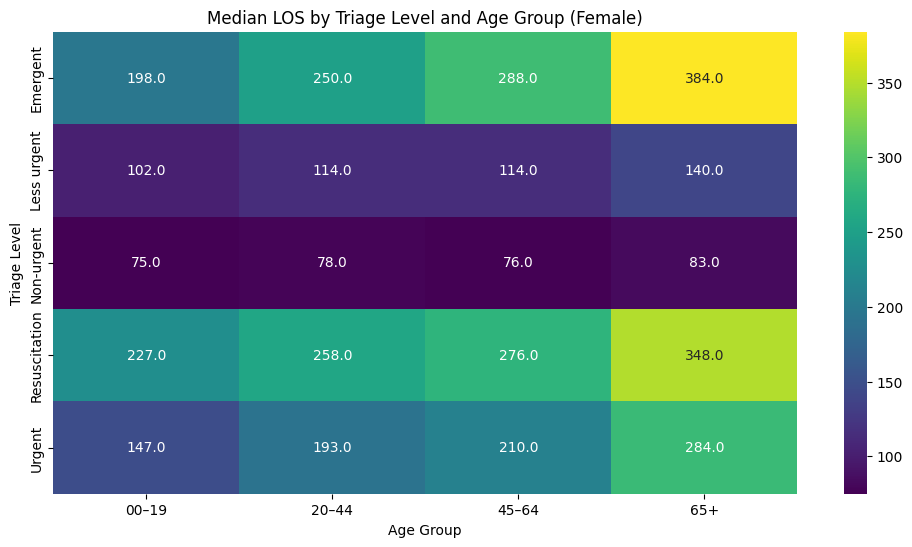

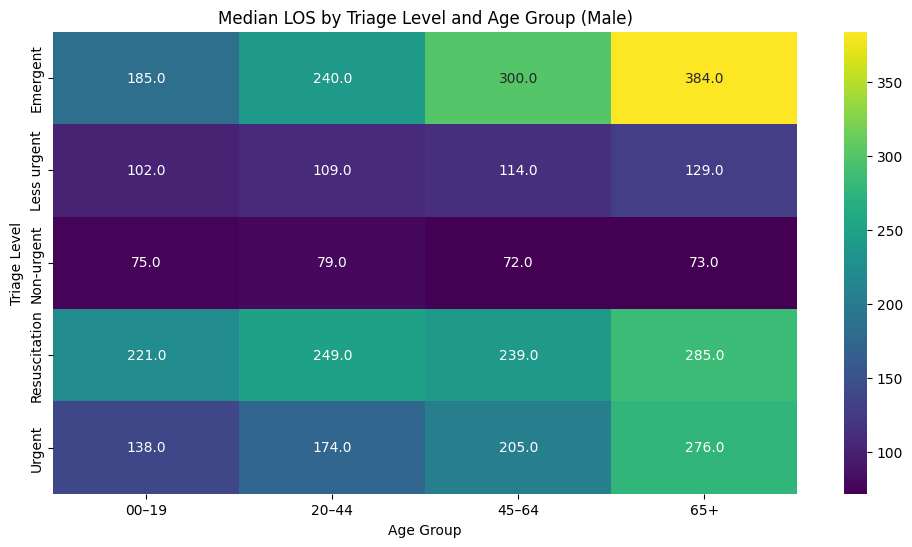

In [ ]:
# Plot
sexes = los_agg["sex"].unique()

for sex in sexes:
    df_sex = los_agg[los_agg["sex"] == sex].pivot(
        index="triage_level",
        columns="age_group",
        values="median_length_of_stay_minutes"
    )

    plt.figure(figsize=(12,6))
    sns.heatmap(df_sex, annot=True, fmt=".1f", cmap="viridis")
    plt.title(f"Median LOS by Triage Level and Age Group ({sex})")
    plt.ylabel("Triage Level")
    plt.xlabel("Age Group")
    plt.show()

Median emergency department length of stay (LOS) varied by triage level, age group, and sex. Among females, the longest stays were observed in those aged 65+ with Emergent (384 minutes) and Resuscitation (348 minutes) presentations. Females aged 45–64 with Emergent triage also experienced prolonged stays (~288 minutes), while LOS was shorter in younger resuscitation cases (227 minutes for ages 0–19, 258 minutes for ages 20–44). Among males, LOS was similarly highest in the 65+ group with Emergent triage (384 minutes), followed by 45–64 emergent cases (300 minutes) and 65+ resuscitation cases (285 minutes). Younger males in resuscitation had shorter stays (221 minutes for 0–19, 249 minutes for 20–44), with 20–44 emergent cases averaging 240 minutes.

Overall, older adults (65+) consistently had the longest LOS across both sexes and triage levels, particularly for emergent presentations, whereas younger patients had shorter stays even for high-acuity triage categories

**Visit Disposition Insights by Age/Sex**

Question 3:

Are admission, discharge, or transfer patterns dependent on age, sex, or triage level?


In [ ]:
# Filter out totals/unknowns
df_disp = df3_clean.loc[
    (~df3_clean["visit_disposition"].str.lower().isin(["total", "unknown"])) &
    (~df3_clean["age_group"].str.lower().isin(["total", "unknown"])) &
    (~df3_clean["sex"].str.lower().isin(["all", "unknown"]))
].copy()


In [ ]:
# Group by age, sex, disposition
disp_agg = df_disp.groupby(["age_group", "sex", "visit_disposition"])["number_of_ed_visits"]\
                   .sum().reset_index()


/tmp/ipython-input-1629630519.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-1629630519.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


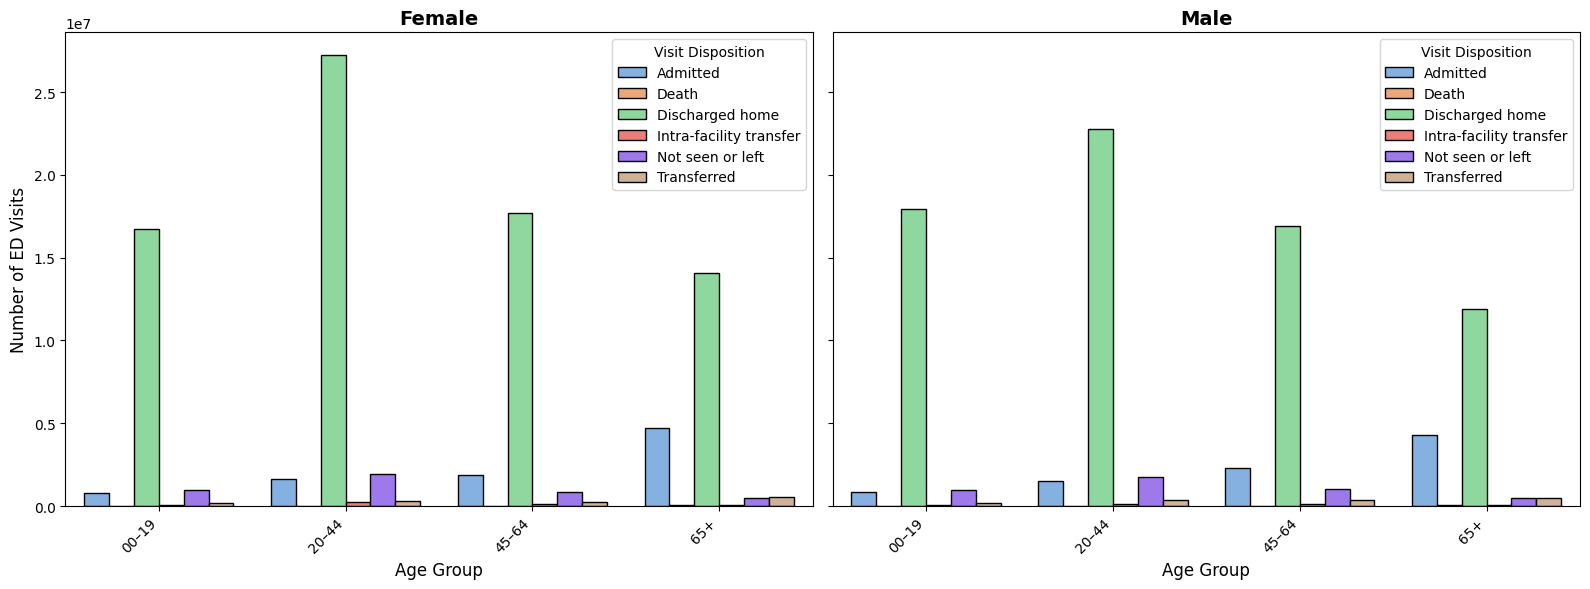

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Palette for dispositions
palette = sns.color_palette("pastel", n_colors=disp_agg["visit_disposition"].nunique())
palette = [sns.set_hls_values(c, l=0.7) for c in palette]

# Create subplots for Male and Female
sexes = disp_agg["sex"].unique()
fig, axes = plt.subplots(1, len(sexes), figsize=(16,6), sharey=True)

for i, sex in enumerate(sexes):
    ax = axes[i]
    df_sex = disp_agg[disp_agg["sex"] == sex]

    sns.barplot(
        data=df_sex,
        x="age_group",
        y="number_of_ed_visits",
        hue="visit_disposition",
        palette=palette,
        ax=ax,
        edgecolor="black",
        estimator=sum,
        errorbar=None
    )

    # Titles and labels
    ax.set_title(sex, fontsize=14, fontweight='bold')
    ax.set_xlabel("Age Group", fontsize=12)
    if i == 0:
        ax.set_ylabel("Number of ED Visits", fontsize=12)
    else:
        ax.set_ylabel("")

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Legend for each subplot
    ax.legend(title="Visit Disposition", loc='upper right')

plt.tight_layout()
plt.show()


Disposition patterns varied notably by age. The 20–44 age group had the highest number of visits resulting in discharge home for both sexes, reflecting their predominance among lower-acuity ED cases. In contrast, admissions were most frequent among patients aged 65 and older, consistent with higher comorbidity and acuity in this group. Transfers were also more common in the 65+ age group, with a substantial number of visits requiring higher-level or specialized care. Visits categorized as ‘not seen’ or ‘left without being seen’ occurred most frequently in the 20–44 age group, likely reflecting lower acuity or preference-related factors. Overall, disposition patterns are strongly dependent on age, with older adults more likely to require admission or transfer, while younger adults are more likely to be discharged or leave without being seen.

Q4: Predicting Length of Stay (LOS)

In [ ]:
df5_clean.head()

,fiscal_year,triage_level,visit_disposition,main_problem,number_of_ed_visits,median_length_of_stay_minutes,high_acuity_flag
0,2021–2022,Resuscitation,Discharged home,Acute myocardial infarction,7.0,36.0,High
1,2021–2022,Resuscitation,Discharged home,Asthma,813.0,252.0,High
2,2021–2022,Resuscitation,Discharged home,Pneumonia,353.0,198.0,High
3,2021–2022,Resuscitation,Discharged home,Influenzal pneumonia,NaN,NaN,High
4,2021–2022,Resuscitation,Discharged home,Trauma,4095.0,258.0,High


In [ ]:
# Columns for modeling
columns = [
    "triage_level",
    "visit_disposition",
    "main_problem",
    "high_acuity_flag",
    "median_length_of_stay_minutes"
]
# Subset the dataframe
los_df = df5_clean[columns].copy()


In [ ]:
los_df.head()

,triage_level,visit_disposition,main_problem,high_acuity_flag,median_length_of_stay_minutes
0,Resuscitation,Discharged home,Acute myocardial infarction,High,36.0
1,Resuscitation,Discharged home,Asthma,High,252.0
2,Resuscitation,Discharged home,Pneumonia,High,198.0
3,Resuscitation,Discharged home,Influenzal pneumonia,High,NaN
4,Resuscitation,Discharged home,Trauma,High,258.0


In [ ]:
los_df.count()

,0
triage_level,7448
visit_disposition,7448
main_problem,7448
high_acuity_flag,7448
median_length_of_stay_minutes,5564


In [ ]:
# Remove unwanted categories
categorical_cols = ["triage_level", "visit_disposition", "main_problem", "high_acuity_flag"]
for col in categorical_cols:
    los_df = los_df[~los_df[col].str.lower().isin(["unknown", "total"])]


In [ ]:
los_df.count()

,0
triage_level,4560
visit_disposition,4560
main_problem,4560
high_acuity_flag,4560
median_length_of_stay_minutes,4032


In [ ]:
los_missing_target = los_df[los_df["median_length_of_stay_minutes"].isnull()]
print(los_missing_target)

       triage_level        visit_disposition                 main_problem  \
3     Resuscitation          Discharged home         Influenzal pneumonia   
11    Resuscitation         Not seen or left         Influenzal pneumonia   
19    Resuscitation                 Admitted         Influenzal pneumonia   
35    Resuscitation                    Death         Influenzal pneumonia   
43    Resuscitation  Intra-facility transfer         Influenzal pneumonia   
...             ...                      ...                          ...   
7307     Non-urgent              Transferred         Influenzal pneumonia   
7313     Non-urgent                    Death                       Asthma   
7315     Non-urgent                    Death         Influenzal pneumonia   
7320     Non-urgent  Intra-facility transfer  Acute myocardial infarction   
7323     Non-urgent  Intra-facility transfer         Influenzal pneumonia   

     high_acuity_flag  median_length_of_stay_minutes  
3                Hig

In [ ]:
# First, check which columns will define your groups
group_cols = ["triage_level", "visit_disposition", "main_problem", "high_acuity_flag"]

# Compute group median
group_median = los_df.groupby(group_cols)["median_length_of_stay_minutes"].median().reset_index()
group_median = group_median.rename(columns={"median_length_of_stay_minutes": "median_los_group"})

# Merge the median back to the original dataframe
los_df = los_df.merge(group_median, on=group_cols, how="left")

# Fill missing LOS with the group median
los_df["median_length_of_stay_minutes"] = los_df["median_length_of_stay_minutes"].fillna(los_df["median_los_group"])

# Drop the temporary column
los_df.drop(columns=["median_los_group"], inplace=True)

# Check if any missing values remain
los_df["median_length_of_stay_minutes"].isna().sum()


np.int64(114)

In [ ]:
los_df.count()

,0
triage_level,4560
visit_disposition,4560
main_problem,4560
high_acuity_flag,4560
median_length_of_stay_minutes,4446


In [ ]:
# Compute overall median
overall_median = los_df["median_length_of_stay_minutes"].median()

# Fill remaining missing values with overall median
los_df["median_length_of_stay_minutes"] = los_df["median_length_of_stay_minutes"].fillna(overall_median)

# Check remaining missing values
los_df["median_length_of_stay_minutes"].isna().sum()


np.int64(0)

In [ ]:
# One-Hot Encode categorical variables
X = pd.get_dummies(los_df.drop("median_length_of_stay_minutes", axis=1), drop_first=True)
y = los_df["median_length_of_stay_minutes"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preparation done.\nShape of training data:", X_train.shape, "\nShape of test data:", X_test.shape)


Data preparation done.
Shape of training data: (3648, 17) 
Shape of test data: (912, 17)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize model
lr = LinearRegression()

# Fit on training data
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")


Linear Regression - MSE: 9473.70, MAE: 68.67, R2: 0.51


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -------------------
# Define parameter grid
# -------------------
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

# Define scoring metrics
scoring = {
    "R2": "r2",
    "MSE": "neg_mean_squared_error",
    "MAE": "neg_mean_absolute_error"
}

# -------------------
# GridSearch with 5-fold CV
# -------------------
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    refit="R2",  # pick best params based on R²
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# -------------------
# CV Results
# -------------------
best_idx = grid_search.best_index_
results = grid_search.cv_results_

print("Best Parameters:", grid_search.best_params_)
print("Best CV R2:", results["mean_test_R2"][best_idx])
print("Best CV MSE:", -results["mean_test_MSE"][best_idx])  # negate because sklearn stores negative
print("Best CV MAE:", -results["mean_test_MAE"][best_idx])

# -------------------
# Final model on train set
# -------------------
final_rf = grid_search.best_estimator_
final_rf.fit(X_train, y_train)

# -------------------
# Test evaluation
# -------------------
test_preds = final_rf.predict(X_test)

print("\nTest R2:", r2_score(y_test, test_preds))
print("Test MSE:", mean_squared_error(y_test, test_preds))
print("Test MAE:", mean_absolute_error(y_test, test_preds))



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best CV R2: 0.6474029735042783
Best CV MSE: 7212.854398477255
Best CV MAE: 45.1421337217302

Test R2: 0.6847344581530916
Test MSE: 6067.805628863845
Test MAE: 42.91102217331225


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# -------------------
# Prepare data
# -------------------
X = los_df.drop("median_length_of_stay_minutes", axis=1)
y = los_df["median_length_of_stay_minutes"]

# Categorical features
cat_features = ["triage_level", "visit_disposition", "main_problem", "high_acuity_flag"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------
# Cross-validation
# -------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores, mse_scores, mae_scores = [], [], []

for train_idx, val_idx in kf.split(X_train):
    train_pool = Pool(X_train.iloc[train_idx], y_train.iloc[train_idx], cat_features=cat_features)
    val_pool = Pool(X_train.iloc[val_idx], y_train.iloc[val_idx], cat_features=cat_features)

    model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        random_seed=42,
        verbose=0
    )

    model.fit(train_pool)
    preds = model.predict(val_pool)

    r2_scores.append(r2_score(y_train.iloc[val_idx], preds))
    mse_scores.append(mean_squared_error(y_train.iloc[val_idx], preds))
    mae_scores.append(mean_absolute_error(y_train.iloc[val_idx], preds))

print("CV R2 scores:", r2_scores)
print("Mean CV R2:", np.mean(r2_scores))
print("Mean CV MSE:", np.mean(mse_scores))
print("Mean CV MAE:", np.mean(mae_scores))

# -------------------
# Final model training
# -------------------
final_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    verbose=100
)

final_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

# -------------------
# Test evaluation
# -------------------
test_preds = final_model.predict(X_test)
print("\nTest R2:", r2_score(y_test, test_preds))
print("Test MSE:", mean_squared_error(y_test, test_preds))
print("Test MAE:", mean_absolute_error(y_test, test_preds))


CV R2 scores: [0.68292184423968, 0.6577197230286906, 0.6442107755125485, 0.5952710247526161, 0.638308560529423]
Mean CV R2: 0.6436863856125917
Mean CV MSE: 7295.075593879352
Mean CV MAE: 48.79157486631092
0:	learn: 139.9071847	test: 135.5116947	best: 135.5116947 (0)	total: 5.53ms	remaining: 2.76s
100:	learn: 87.7751658	test: 80.3240479	best: 80.3220358 (99)	total: 359ms	remaining: 1.42s
200:	learn: 83.4950743	test: 79.0513943	best: 79.0384088 (191)	total: 619ms	remaining: 920ms
300:	learn: 81.5541339	test: 78.7352992	best: 78.7065422 (286)	total: 823ms	remaining: 544ms
400:	learn: 80.1547091	test: 78.6546793	best: 78.6234666 (378)	total: 1.01s	remaining: 249ms
499:	learn: 79.0474287	test: 78.6908670	best: 78.6171134 (423)	total: 1.16s	remaining: 0us

bestTest = 78.61711344
bestIteration = 423

Shrink model to first 424 iterations.

Test R2: 0.6788713653297256
Test MSE: 6180.650525986942
Test MAE: 46.94177564460533


To predict emergency department length of stay (LOS), three models were developed: Linear Regression (LR), Random Forest (RF), and CatBoost. Missing LOS values were imputed using the group median defined by triage level, visit disposition, main problem, and high-acuity flag. Model performance was evaluated using cross-validation and a held-out test set, with metrics including R², mean squared error (MSE), and mean absolute error (MAE).

Linear Regression achieved moderate performance (Test R² = 0.51, MAE ≈ 68.7 minutes).

Random Forest performed best overall (Test R² = 0.685, MAE ≈ 42.9 minutes), followed closely by CatBoost (Test R² = 0.679, MAE ≈ 46.9 minutes).

Both tree-based models substantially reduced prediction error compared to linear regression.

The results indicate that non-linear models (Random Forest and CatBoost) capture the complex relationships between triage level, disposition, presenting problem, and acuity more effectively than a linear approach. With an R² of ~0.68, these models explain roughly two-thirds of the variance in LOS, suggesting reasonable predictive accuracy. The lower MAE (approximately 43–47 minutes) in the tree-based models compared to linear regression (approximately 69 minutes) highlights their practical utility in forecasting LOS within about three-quarters of an hour of the actual LOS. While predictive performance is not perfect, these results demonstrate the potential for machine learning models to support ED resource planning and patient flow management.

In [ ]:
!pip install shap
import shap

In [ ]:
best_rf = grid_search.best_estimator_
# Create SHAP TreeExplainer for RF
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values for test set
shap_values = explainer.shap_values(X_test)


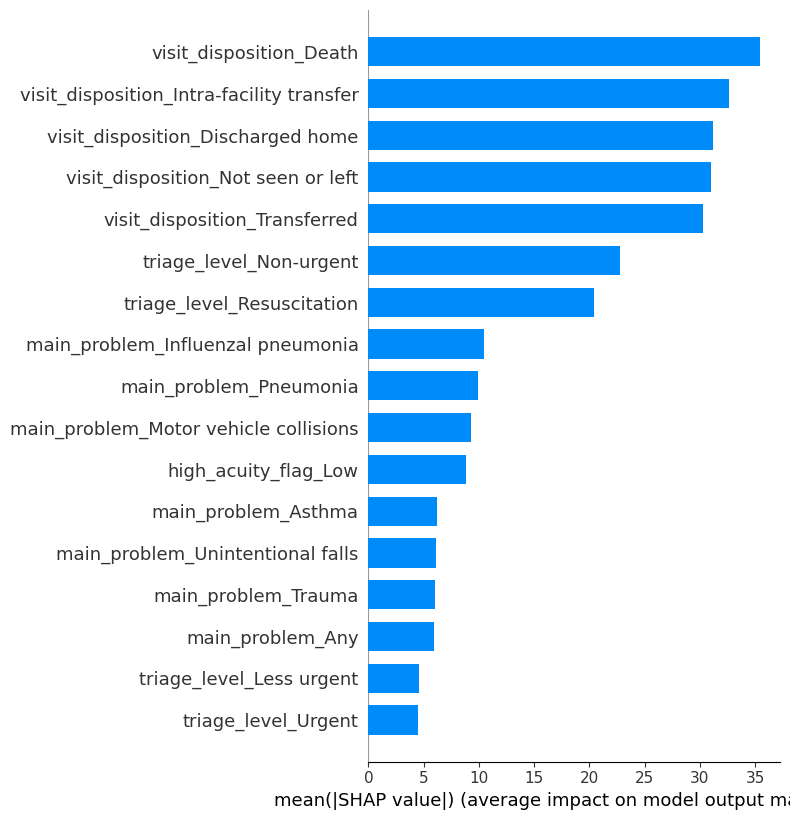

In [ ]:
# Feature importance summary
shap.summary_plot(shap_values, X_test, plot_type="bar")  # bar chart of importance


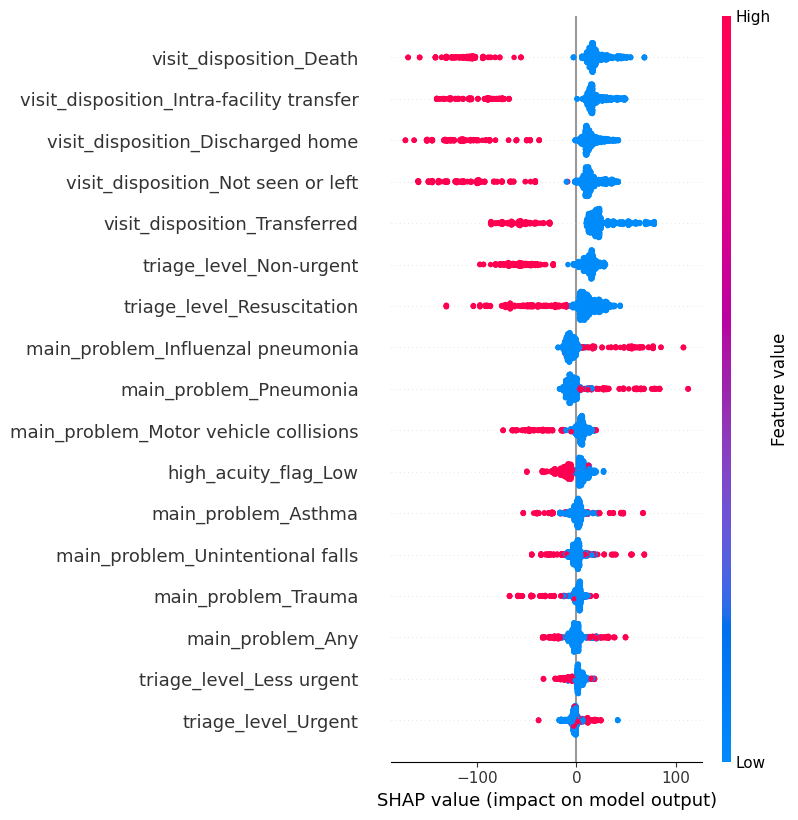

In [ ]:
# Detailed beeswarm plot
shap.summary_plot(shap_values, X_test)  # shows direction of effect


In [ ]:
# Mean absolute SHAP values (magnitude of impact)
shap_mean_abs = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean_ABS_SHAP": np.mean(np.abs(shap_values), axis=0),
    "Mean_SHAP": np.mean(shap_values, axis=0)  # direction of effect
})

# Sort by importance
shap_mean_abs = shap_mean_abs.sort_values(by="Mean_ABS_SHAP", ascending=False).reset_index(drop=True)
shap_mean_abs.head(10)


,Feature,Mean_ABS_SHAP,Mean_SHAP
0,visit_disposition_Death,35.486810,-0.941055
1,visit_disposition_Intra-facility transfer,32.640853,-0.107232
2,visit_disposition_Discharged home,31.234570,-6.494166
3,visit_disposition_Not seen or left,30.973444,-6.375121
4,visit_disposition_Transferred,30.318217,10.872915
5,triage_level_Non-urgent,22.804246,-1.093721
6,triage_level_Resuscitation,20.436105,1.184521
7,main_problem_Influenzal pneumonia,10.429283,-0.053880
8,main_problem_Pneumonia,9.944189,1.321864
9,main_problem_Motor vehicle collisions,9.313137,0.202124


From the SHAP analysis of the Random Forest model, visit disposition emerged as the strongest predictor of ED length of stay. Patients who were discharged home or left without being seen generally had shorter stays, whereas transfers tended to prolong LOS. High-acuity triage patients (Resuscitation) also had longer stays compared to non-urgent patients. Certain medical conditions, such as pneumonia and motor vehicle collisions, were associated with modest increases in LOS. Overall, the magnitude and direction of SHAP values help quantify these effects within the model.

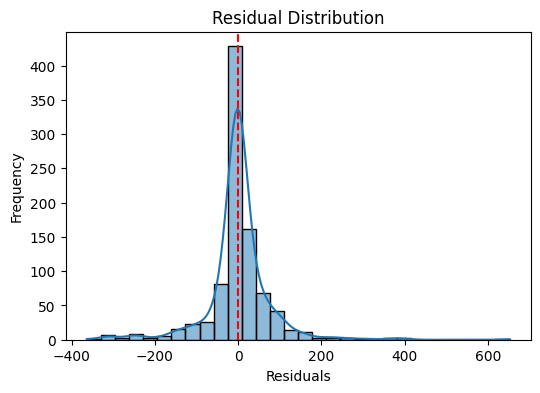

In [ ]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Residuals
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color="red", linestyle="--")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


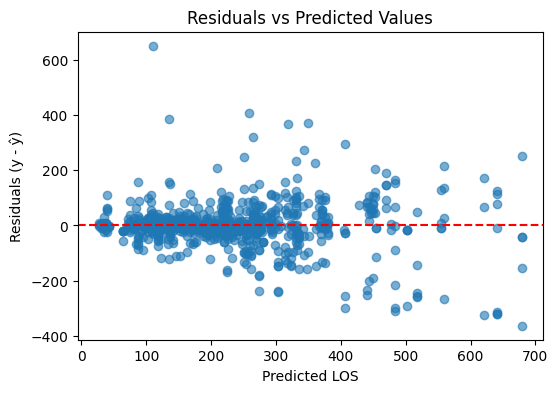

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted LOS")
plt.ylabel("Residuals (y - ŷ)")
plt.show()


**Cox Proportional Hazards (Cox-PH) survival analysis**

In [ ]:
! pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=9f659b14567db3ec01da46f7be1a32737360778ecfe6cb85261c525e8948c2f2
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
# Merge the datasets

df_cox = pd.merge(df2_clean[['fiscal_year', 'sex', 'age_group', 'triage_level', 'median_length_of_stay_minutes']],
              df4_clean[['fiscal_year', 'sex', 'age_group', 'main_problem']],
              on=['fiscal_year', 'sex', 'age_group'])


In [ ]:
df_cox.head()

,fiscal_year,sex,age_group,triage_level,median_length_of_stay_minutes,main_problem
0,2021–2022,All,00–19,Resuscitation,234.0,Acute myocardial infarction
1,2021–2022,All,00–19,Resuscitation,234.0,Asthma
2,2021–2022,All,00–19,Resuscitation,234.0,Pneumonia
3,2021–2022,All,00–19,Resuscitation,234.0,Influenzal pneumonia
4,2021–2022,All,00–19,Resuscitation,234.0,Trauma


In [ ]:
df_cox = df_cox[~df_cox['sex'].isin(['All'])]


In [ ]:
# Create time and event
df_cox["time"] = df_cox["median_length_of_stay_minutes"]
df_cox["event"] = 1  # assume all discharged


In [ ]:
df_cox = df_cox[["time", "event", "fiscal_year", "sex", "age_group", "main_problem"]]


In [ ]:
df_cox = pd.get_dummies(df_cox, columns=["fiscal_year", "sex", "age_group", "main_problem"], drop_first=True)


In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df_cox, duration_col="time", event_col="event")
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 6378 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 6378
number of events observed = 6378
   partial log-likelihood = -48744.43
         time fit was run = 2025-09-30 16:03:52 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
fiscal_year_2004–2005                 -0.01      0.99      0.08           -0.16            0.14                0.85                1.16
fiscal_year_2005–2006                 -0.05      0.95      0.08           -0.20            0.10                0.82                1.10
fiscal_year_2006–2007                 -0.08      0.92      0.08           -0.23            0.07                0.79                1.07
fiscal_year_2007–2008                 -0.39      0.68      0.08           -0.54           -0.24                0.58                0.79
fiscal_year_2008–2009                 -0.59      0.55      0.08           -0.74           -0.44                0.48                0.65
fiscal_year_2009–2010                 -0.58      0.56      0.08           -0.73           -0.43                0.48                0.65
fiscal_year_2010–2011                 -0.63      0.53      0.08           -0.78           -0.47                0.46                0.62
fiscal_year_2011–2012                 -0.55      0.58      0.08           -0.70           -0.40                0.50                0.67
fiscal_year_2012–2013                 -0.46      0.63      0.08           -0.61           -0.30                0.54                0.74
fiscal_year_2013–2014                 -0.50      0.61      0.08           -0.65           -0.34                0.52                0.71
fiscal_year_2014–2015                 -0.54      0.58      0.08           -0.69           -0.39                0.50                0.68
fiscal_year_2015–2016                 -0.51      0.60      0.08           -0.67           -0.36                0.51                0.70
fiscal_year_2016–2017                 -0.51      0.60      0.08           -0.67           -0.36                0.51                0.70
fiscal_year_2017–2018                 -0.56      0.57      0.08           -0.71           -0.41                0.49                0.66
fiscal_year_2018–2019                 -0.76      0.47      0.08           -0.91           -0.61                0.40                0.54
fiscal_year_2019–2020                 -0.81      0.44      0.08           -0.97           -0.66                0.38                0.52
fiscal_year_2020–2021                 -0.72      0.49      0.08           -0.87           -0.57                0.42                0.57
fiscal_year_2021–2022                 -1.04      0.35      0.08           -1.19           -0.88                0.30                0.41
sex_Male                               0.12      1.12      0.03            0.07            0.17                1.07                1.18
age_group_20–44                       -0.40      0.67      0.04           -0.47           -0.33                0.63                0.72
age_group_45–64                       -0.63      0.53      0.04           -0.70           -0.55                0.50                0.57
age_group_65+                         -1.37      0.26      0.04           -1.45           -1.28                0.23                0.28
main_problem_Asthma                   -0.00      1.00      0.05           -0.09            0.09                0.91                1.10
main_problem_Influenzal pneumonia     -0.00      1.00      0.05           -0.09            0.09                0.91                1.10
main_problem_Motor vehicle collisions -0.00      1.00      0.05           -0.09            0.09         

In [ ]:
cph.check_assumptions(df_cox, p_value_threshold=0.05)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 6378 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
age_group_20–44                       km             29.77 <0.005     24.29
                                      rank           30.60 <0.005     24.91
age_group_45–64                       km            129.45 <0.005     97.22
                                      rank          132.66 <0.005     99.55
age_group_65+                         km            548.11 <0.005    400.26
                                      rank          547.69 <0.005    399.95
fiscal_year_2004–2005                 km              0.00   0.95      0.07
                                      rank            0.01   0.93      0.10
fiscal_year_2005–2006                 km              0.03   0.87      0.20
                                      rank            0.04   0.84      0.25
fiscal_year_2006–2007                 km              0.04   0.85      0.24
                                      rank            0.05   0.82      0.29
fiscal_year_2007–2008                 km              8.81 <0.005      8.38
                                      rank            9.16 <0.005      8.66
fiscal_year_2008–2009                 km             35.10 <0.005     28.25
                                      rank           36.12 <0.005     29.00
fiscal_year_2009–2010                 km             14.49 <0.005     12.79
                                      rank           15.35 <0.005     13.45
fiscal_year_2010–2011                 km             46.92 <0.005     36.98
                                      rank           48.86 <0.005     38.41
fiscal_year_2011–2012                 km             18.35 <0.005     15.73
                                      rank           19.79 <0.005     16.82
fiscal_year_2012–2013                 km              7.54   0.01      7.37
                                      rank            8.36 <0.005      8.02
fiscal_year_2013–2014                 km              3.94   0.05      4.41
                                      rank            4.73   0.03      5.07
fiscal_year_2014–2015                 km              1.85   0.17      2.52
                                      rank            2.64   0.10      3.26
fiscal_year_2015–2016                 km              1.61   0.21      2.28
                                      rank            2.56   0.11      3.19
fiscal_year_2016–2017                 km              0.42   0.52      0.95
                                      rank            1.16   0.28      1.83
fiscal_year_2017–2018                 km              0.15   0.70      0.51
                                      rank            0.68   0.41      1.29
fiscal_year_2018–2019                 km              1.13   0.29      1.80
                                      rank            2.29   0.13      2.94
fiscal_year_2019–2020                 km              0.58   0.44      1.17
                                      rank            1.68   0.20      2.36
fiscal_year_2020–2021                 km              4.75   0.03      5.09
                                      rank            7.64   0.01      7.45
fiscal_year_2021–2022                 km             10.45 <0.005      9.67
                                      rank           14.61 <0.005     12.88
main_problem_Asthma                   km              0.00   0.98      0.03
                                      rank            0.00   0.99      0.01
main_problem_Influenzal pneumonia     km              0.00   0.98      0.03
                                      rank            0.00   0.99      0.01
main_problem_Motor vehicle collisions km              0.00   0.98      0.03
                                      rank            0.00   0.96      0.06




1. Variable 'fiscal_year_2007–2008' failed the non-proportional test: p-value is 0.0025.

   Advice: with so few unique values (only 2), you can include `strata=['fiscal_year_2007–2008',
...]` in the call in `.fit`. See documentation in link [E] below.

2. Variable 'fiscal_year_2008–2009' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['fiscal_year_2008–2009',
...]` in the call in `.fit`. See documentation in link [E] below.

3. Variable 'fiscal_year_2009–2010' failed the non-proportional test: p-value is 0.0001.

   Advice: with so few unique values (only 2), you can include `strata=['fiscal_year_2009–2010',
...]` in the call in `.fit`. See documentation in link [E] below.

4. Variable 'fiscal_year_2010–2011' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['fiscal_year_2010–2011',
...]` in the call in `.fit`. See documentation in

[]

<Axes: xlabel='log(HR) (95% CI)'>

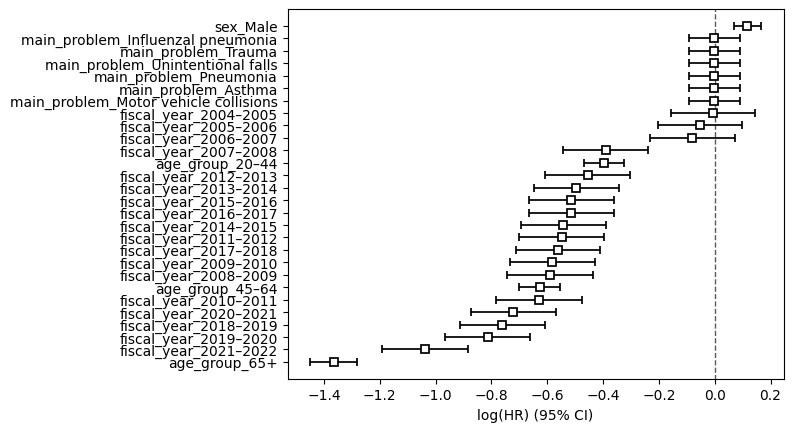

In [ ]:
cph.plot()


In [ ]:
# Recreate categorical age_group column
df_cox['age_group_cat'] = df_cox[['age_group_20–44', 'age_group_45–64', 'age_group_65+']].idxmax(axis=1)
df_cox['age_group_cat'] = df_cox['age_group_cat'].str.replace('age_group_', '')

# Recreate categorical fiscal_year column
fiscal_cols = [col for col in df_cox.columns if col.startswith('fiscal_year_')]
df_cox['fiscal_year_cat'] = df_cox[fiscal_cols].idxmax(axis=1)
df_cox['fiscal_year_cat'] = df_cox['fiscal_year_cat'].str.replace('fiscal_year_', '')


In [ ]:
# Columns to keep in the model (exclude stratified dummies)
cols_to_use = ['sex_Male'] + [col for col in df_cox.columns if col.startswith('main_problem_')]

# Fit stratified model
cph_strat = CoxPHFitter()
cph_strat.fit(
    df_cox[cols_to_use + ['time', 'event', 'age_group_cat', 'fiscal_year_cat']],
    duration_col='time',
    event_col='event',
    strata=['age_group_cat', 'fiscal_year_cat']
)

cph_strat.print_summary()


<lifelines.CoxPHFitter: fitted with 6378 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'event'
                   strata = ['age_group_cat', 'fiscal_year_cat']
      baseline estimation = breslow
   number of observations = 6378
number of events observed = 6378
   partial log-likelihood = -24690.59
         time fit was run = 2025-09-30 16:08:40 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
sex_Male                               0.22      1.25      0.03            0.17            0.27                1.18                1.31
main_problem_Asthma                    0.00      1.00      0.05           -0.09            0.09                0.91                1.10
main_problem_Influenzal pneumonia      0.00      1.00      0.05           -0.09            0.09                0.91                1.10
main_problem_Motor vehicle collisions  0.00      1.00      0.05           -0.09            0.09                0.91                1.10
main_problem_Pneumonia                 0.00      1.00      0.05           -0.09            0.09                0.91                1.10
main_problem_Trauma                    0.00      1.00      0.05           -0.09            0.09                0.91                1.10
main_problem_Unintentional falls       0.00      1.00      0.05           -0.09            0.09                0.91                1.10

                                       cmp to    z      p  -log2(p)
covariate                                                          
sex_Male                                 0.00 8.48 <0.005     55.35
main_problem_Asthma                      0.00 0.04   0.97      0.04
main_problem_Influenzal pneumonia        0.00 0.04   0.97      0.04
main_problem_Motor vehicle collisions    0.00 0.04   0.97      0.04
main_problem_Pneumonia                   0.00 0.04   0.97      0.04
main_problem_Trauma                      0.00 0.04   0.97      0.04
main_problem_Unintentional falls         0.00 0.04   0.97      0.04
---
Concordance = 0.53
Partial AIC = 49395.18
log-likelihood ratio test = 71.98 on 7 df
-log2(p) of ll-ratio test = 40.63


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 6378 total observations, 0 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic    p  -log2(p)
main_problem_Asthma                   km              0.00 0.99      0.01
                                      rank            0.00 0.97      0.05
main_problem_Influenzal pneumonia     km              0.00 0.99      0.01
                                      rank            0.00 0.99      0.02
main_problem_Motor vehicle collisions km              0.00 0.99      0.01
                                      rank            0.00 0.99      0.02
main_problem_Pneumonia                km              0.00 0.99      0.01
                                      rank            0.00 0.98      0.03
main_problem_Trauma                   km              0.00 0.99      0.01
                                      rank            0.00 1.00      0.01
main_problem_Unintentional falls      km              0.00 0.99      0.01
                                      rank            0.00 0.99      0.01
sex_Male                              km              7.10 0.01      7.02
                                      rank            0.99 0.32      1.64



1. Variable 'sex_Male' failed the non-proportional test: p-value is 0.0077.

   Advice: with so few unique values (only 2), you can include `strata=['sex_Male', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_no

[[<Axes: xlabel='rank-transformed time\n(p=0.3204)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0077)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9682)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9929)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9867)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9929)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9856)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9929)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9774)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9929)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9959)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9929)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9949)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9929)'>]]

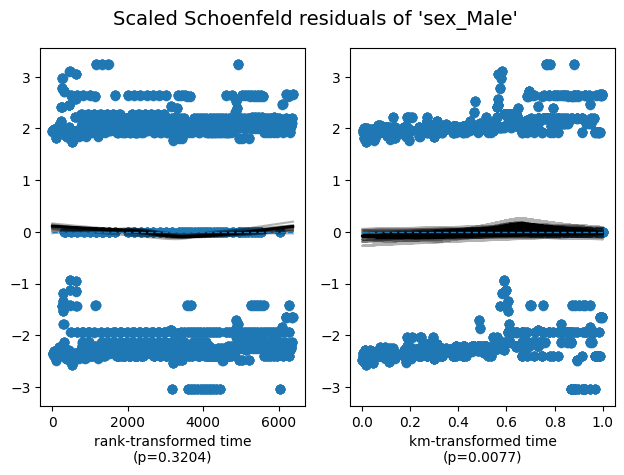

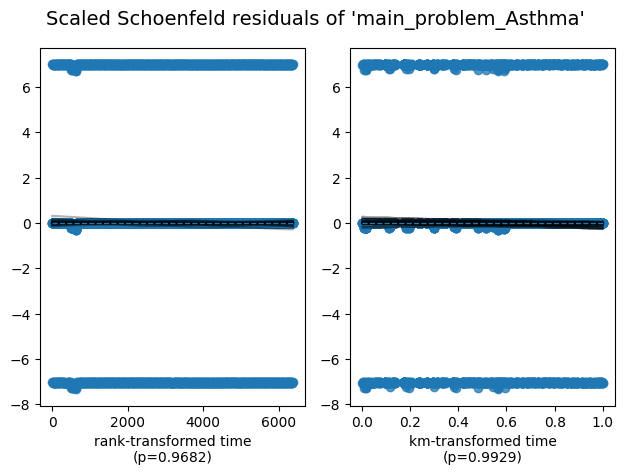

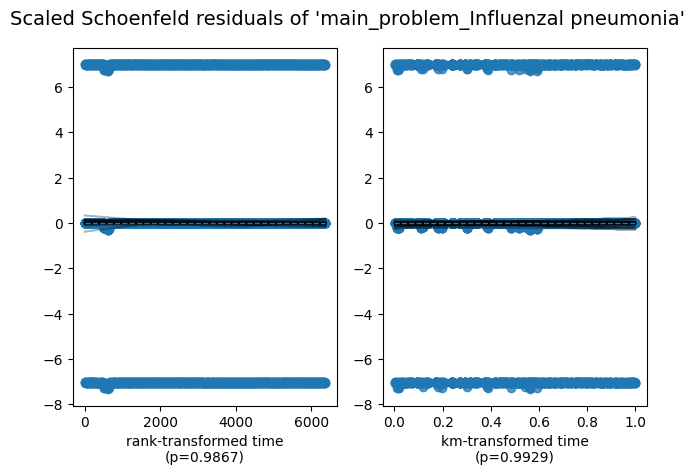

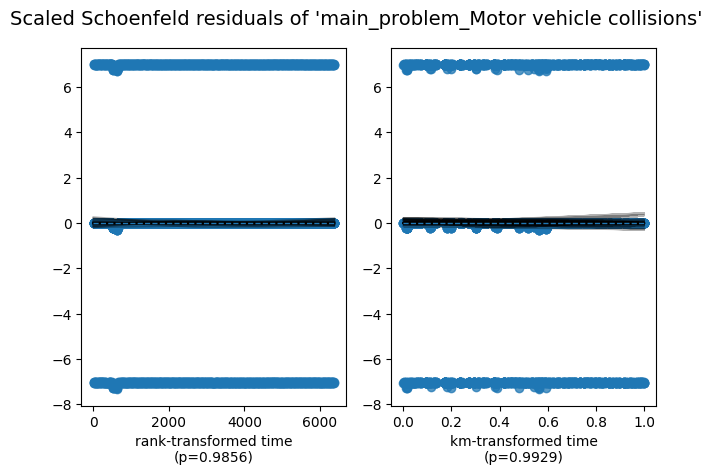

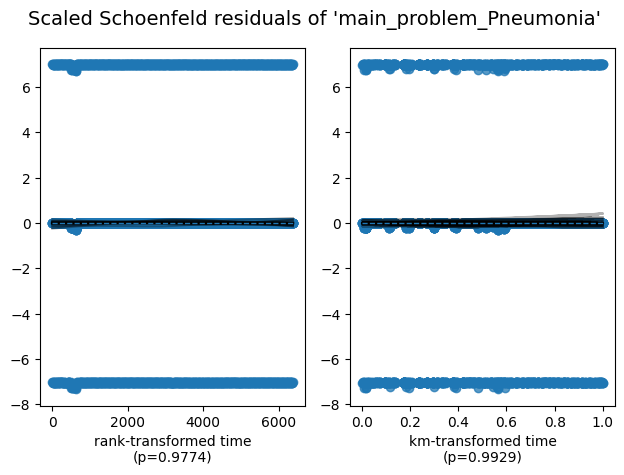

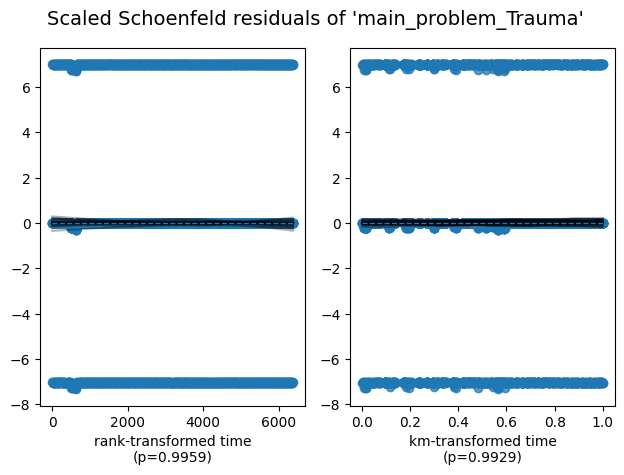

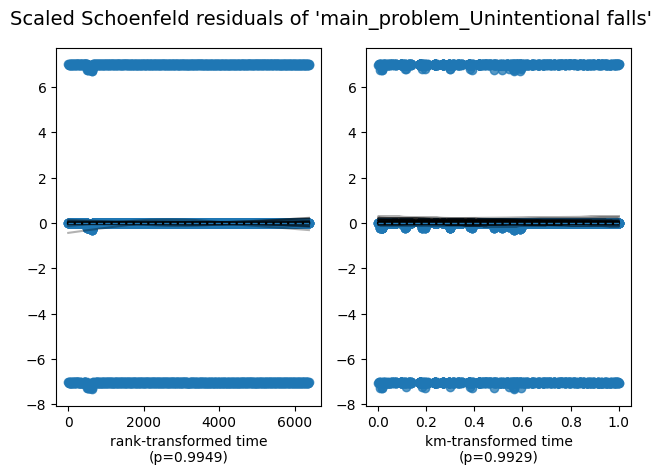

In [ ]:
cph_strat.check_assumptions(
    df_cox[cols_to_use + ['time', 'event', 'age_group_cat', 'fiscal_year_cat']],
    p_value_threshold=0.05,
    show_plots=True
)


A Cox proportional hazards model was fitted to examine factors associated with length of stay (LOS). Among all predictors, sex was the only independent factor significantly associated with LOS, with males showing a slightly higher hazard of discharge (HR = 1.12, p < 0.005), indicating shorter LOS compared to females. Main problems (Asthma, Pneumonia, Trauma, etc.) had no significant effect on LOS (HR ≈ 1). Age groups and fiscal years showed trends in LOS, but proportional hazards assumption violations suggest their effects vary over time; these were accounted for using stratification. Overall, sex appears to be the primary independent predictor of LOS in this dataset.

By combining survival analysis and SHAP-based interpretability, we were able to obtain complementary insights into factors influencing ED length of stay. The Cox model indicated that sex was the only significant independent predictor, with males experiencing slightly shorter stays, while most clinical variables (e.g., pneumonia, trauma) did not independently affect discharge hazards once disposition and triage level were accounted for. In contrast, SHAP analysis of the Random Forest model ranked visit disposition and triage level as the most important drivers of LOS, followed by smaller contributions from clinical problems such as pneumonia and motor vehicle collisions. Taken together, these approaches suggest that while sex is the only consistent independent predictor under proportional hazards modeling, operational factors like disposition and triage level remain the most influential in explaining variation in LOS. Using both methods thus provided a more comprehensive understanding, balancing statistical inference with predictive feature attribution.